Code to read survey results

Number of participants by region and language used.
The type of sample method used in the survey (simple, complex, etc.).
What is the survey representative of when you use the sample weights and when you don’t use the sample weights. This could be country, household, or individual.
The questions you would like to use in the thesis together with some descriptive statistics (for this you can omit considering the sample design and weights):
type of data: dichotomous; categorical (which categories); continuous (which range); open question (which language).
Correlation analysis

Data Reading and Preparation:

In [1]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

from langchain_core.prompts import ChatPromptTemplate
from langchain_groq import ChatGroq
from langchain_openai import ChatOpenAI

import sys
import json
# Add the parent directory to the path
sys.path.append('..')

# Now you can import the config module
from config import groqkey, OPENAI_Key

In [2]:
def read_ods(filename):
    # Use pandas to read the ODS file. The `engine='odf'` parameter is necessary to read ODS files.
    # Adjust the `sheet_name` parameter as needed. By default, it reads the first sheet.
    df = pd.read_excel(filename, engine='odf')
    return df

# Define a function to replace "not numbered" with the value in "Variable Label"
def replace_not_numbered(row):
    if row["Question number\n (Questionnaire file)"] == "not numbered":
        return row["Variable Label\n (Data files)"]
    else:
        return row["Question number\n (Questionnaire file)"]

In [3]:
# Replace 'example.ods' with the path to your ODS file
filename = 'dataverse_files\Wave1\SCALAR_Coastal_Longitudinal_Study_Wave_1_map.ods'

# Read the ODS file
metaInfo = read_ods(filename)

# Initialize empty lists to store grouped response options
question_numbers = []
variable_labels = []
descriptions = []
response_options = []

# Loop through DataFrame rows
current_question = None
for index, row in metaInfo.iterrows():
    if not pd.isnull(row['Question number(Questionnaire file)']):
        # If it's a new question, store its details
        current_question = row['Question number(Questionnaire file)']
        question_numbers.append(row['Question number(Questionnaire file)'])
        variable_labels.append(row['Variable Label(Data files)'])
        descriptions.append(row['Description'])
        response_options.append([(row['Values'], row['Value labels'])])
    elif current_question is not None:
        # If it's a response option, add it to the previous question's response options
        response_options[-1].append((row['Values'], row['Value labels']))

# Create a new DataFrame with grouped response options
grouped_df = pd.DataFrame({
    'Question number(Questionnaire file)': question_numbers,
    'Variable Label(Data files)': variable_labels,
    'Description': descriptions,
    'Response Options': response_options
})

grouped_df

,Question number(Questionnaire file),Variable Label(Data files),Description,Response Options
0,ID,ID,Respondent ID to match respondents between waves,"[(nan, nan)]"
1,not numbered,Q0_age,Age,"[(1.0, 16-24), (2.0, 25-34), (3.0, 35-44), (4...."
2,not numbered,Q0_gender,What gender do you identify with?,"[(1.0, Male), (2.0, Female)]"
3,not numbered,Q0_race_US,What race do you self-identify as? (USA only),"[(1.0, White), (2.0, Black or African American..."
4,not numbered,Q0_ethnicity_ID,What ethnic group do you identify as? (Indones...,"[(1.0, Jawa), (2.0, Sunda), (3.0, Madura), (4...."
...,...,...,...,...
214,Q60,Q60_elder,Yes – adults over 70,"[(0.0, No), (1.0, Yes)]"
215,Q60,Q60_no,No,"[(0.0, No), (1.0, Yes)]"
216,Q60,Q60_not_say,Prefer not to say,"[(0.0, No), (1.0, Yes)]"
217,Q60a,Q60a_parent,Are you the parent or guardian of any children...,"[(0.0, No), (1.0, Yes)]"


In [4]:
#Wave 1
NLDataWave1 = pd.read_csv("dataverse_files\Wave1\SCALAR_Coastal_Longitudinal_Study_Wave_1_NL.csv").set_index("ID")
CNDataWave1 = pd.read_csv("dataverse_files\Wave1\SCALAR_Coastal_Longitudinal_Study_Wave_1_CN.csv").set_index("ID")
IDDataWave1 = pd.read_csv("dataverse_files\Wave1\SCALAR_Coastal_Longitudinal_Study_Wave_1_ID.csv").set_index("ID")
USDataWave1 = pd.read_csv("dataverse_files\Wave1\SCALAR_Coastal_Longitudinal_Wave_1_US.csv").set_index("ID")

#Wave 2
NLDataWave2 = pd.read_csv("dataverse_files\Wave2\SCALAR_Coastal_Longitudinal_Study_Wave_2_NL.csv").set_index("ID")
CNDataWave2 = pd.read_csv("dataverse_files\Wave2\SCALAR_Coastal_Longitudinal_Study_Wave_2_CN.csv").set_index("ID")
IDDataWave2 = pd.read_csv("dataverse_files\Wave2\SCALAR_Coastal_Longitudinal_Study_Wave_2_ID.csv").set_index("ID")
USDataWave2 = pd.read_csv("dataverse_files\Wave2\SCALAR_Coastal_Longitudinal_Wave_2_US.csv").set_index("ID")

#Wave 2 Recontact
NLDataWave2rec = pd.read_csv("dataverse_files\Wave2_Recontact\SCALAR_Coastal_Longitudinal_Study_Recontact_NL.csv").set_index("ID")
CNDataWave2rec = pd.read_csv("dataverse_files\Wave2_Recontact\SCALAR_Coastal_Longitudinal_Study_Recontact_CN.csv").set_index("ID")
IDDataWave2rec = pd.read_csv("dataverse_files\Wave2_Recontact\SCALAR_Coastal_Longitudinal_Study_Recontact_ID.csv").set_index("ID")
USDataWave2rec = pd.read_csv("dataverse_files\Wave2_Recontact\SCALAR_Coastal_Longitudinal_Study_Recontact_US.csv").set_index("ID")

#Wave 3
NLDataWave3 = pd.read_csv("dataverse_files\Wave3\SCALAR_Coastal_Longitudinal_Study_Wave_3_NL.csv").set_index("ID")
CNDataWave3 = pd.read_csv("dataverse_files\Wave3\SCALAR_Coastal_Longitudinal_Study_Wave_3_CN.csv").set_index("ID")
IDDataWave3 = pd.read_csv("dataverse_files\Wave3\SCALAR_Coastal_Longitudinal_Study_Wave_3_ID.csv").set_index("ID")
USDataWave3 = pd.read_csv("dataverse_files\Wave3\SCALAR_Coastal_Longitudinal_Wave_3_US.csv").set_index("ID")

#Wave 4
NLDataWave4 = pd.read_csv("dataverse_files\Wave4\SCALAR_Coastal_Longitudinal_Study_Wave_4_NL.csv").set_index("ID")
CNDataWave4 = pd.read_csv("dataverse_files\Wave4\SCALAR_Coastal_Longitudinal_Study_Wave_4_CN.csv").set_index("ID")
IDDataWave4 = pd.read_csv("dataverse_files\Wave4\SCALAR_Coastal_Longitudinal_Study_Wave_4_ID.csv").set_index("ID")
USDataWave4 = pd.read_csv("dataverse_files\Wave4\SCALAR_Coastal_Longitudinal_Study_Wave_4_US.csv").set_index("ID")

#All waves
AllWave1 = pd.concat([NLDataWave1, CNDataWave1, IDDataWave1, USDataWave1])
AllWave2 = pd.concat([NLDataWave2, CNDataWave2, IDDataWave2, USDataWave2])
AllWave2rec = pd.concat([NLDataWave2rec, CNDataWave2rec, IDDataWave2rec, USDataWave2rec])
AllWave3 = pd.concat([NLDataWave3, CNDataWave3, IDDataWave3, USDataWave3])
AllWave4 = pd.concat([NLDataWave4, CNDataWave4, IDDataWave4, USDataWave4])

#All Data
AllData = pd.concat([AllWave1, AllWave2, AllWave2rec, AllWave3,AllWave4], axis=1,)

In [5]:
#Wave 1 - All data of NL
Survey_Responses = pd.read_csv("dataverse_files\SCALAR_Coastal_Longitudinal_Study_Wave_One_NL.csv").set_index("ID")

In [6]:
Survey_Overview  = pd.read_excel('Survey Questions Overview.xlsx', sheet_name='Wave 1', engine='openpyxl')
# Clean the survey questions dataframe to make it more usable for mapping
# Fill forward non-null ADICO Category values to apply them to all relevant rows, Specify the columns to forward fill excluding "Values" and "Value labels"
columns_to_ffill = [col for col in Survey_Overview.columns if col not in ["Values", "Value labels"]]

# Forward fill the specified columns
Survey_Overview[columns_to_ffill] = Survey_Overview[columns_to_ffill].ffill()
Survey_Overview = Survey_Overview.rename(columns={'ADICO Category': 'ADICO_Category'})

# Apply the function to replace "not numbered" with the value in "Variable Label"
Survey_Overview["Question number\n (Questionnaire file)"] = Survey_Overview.apply(replace_not_numbered, axis=1)
Survey_Overview['Value labels'] = Survey_Overview['Value labels'].astype(str)

# Set the index to {value of "Question number\n (Questionnaire file)"} + "_" + {str(value of "Values")}
Survey_Overview.set_index(Survey_Overview["Variable Label\n (Data files)"] + "_" + Survey_Overview["Values"].astype(str), inplace=True)
Survey_Overview.drop("ID_nan", inplace=True)
Survey_Overview.drop_duplicates(inplace=True)

question_answers_list = []
# Define a function to create the combined string
def combine_description_and_labels(group, question_answers_list, qnum):
    question_subset = Survey_Overview[Survey_Overview["Question number\n (Questionnaire file)"] == group["Question number\n (Questionnaire file)"].iloc[0]]
    # Check if it's the first row instance with the current "Question number\n (Questionnaire file)" column value
    first_instance_index = question_subset[question_subset.duplicated(subset=["Question number\n (Questionnaire file)"], keep="first")].index
    combined_string = ""
    # Concatenate the current row's "Description" and all "Value labels" values
    combined_string += str(group["Description"].iloc[0]) + ", " #+ "; ".join(group["Value labels"].astype(str))
    
    if first_instance_index.size != 0:
        first_description = question_subset["Description"].iloc[0]
        if first_description != group["Description"].iloc[0]:
         # If not the first instance, start with the first instance's "Description" column value
            combined_string += first_description

    question_answers_list = question_answers_list + [combined_string] * group.shape[0]  # Extend the list with the combined strings
    return question_answers_list

# Group by "Variable Label\n (Data files)" and apply the function to create the combined string
for group in Survey_Overview.groupby("Variable Label\n (Data files)",sort=False):
    question_answers_list = combine_description_and_labels(group[1], question_answers_list, group[1]["Question number\n (Questionnaire file)"].iloc[0])
Survey_Overview["question_answers_combined"] = question_answers_list


# Since the dataset has multiple rows per question for different value labels, we'll create a unique mapping
# Create the new mapping dictionary
question_adico_mapping = Survey_Overview[['question_answers_combined','ADICO_Category',"Variable Label\n (Data files)"]].drop_duplicates().set_index('question_answers_combined')

# Filter out questions that are categorized as Attributes, Conditions, or Aims for clarity in analysis
Attributes = list(set([Attribute for Attribute in question_adico_mapping[question_adico_mapping['ADICO_Category'].isin(["Attribute", "Attribute/Condition"])]['Variable Label\n (Data files)']]))
Conditions = list(set([Condition for Condition in question_adico_mapping[question_adico_mapping['ADICO_Category'].isin(["Condition",'Aim/Condition', "Attribute/Condition"])]['Variable Label\n (Data files)']]))
Aims = list(set([Aim for Aim in question_adico_mapping[question_adico_mapping['ADICO_Category'].isin(["Aim", "Aim/Condition"])]['Variable Label\n (Data files)']]))
Attcons = list(set([Attcon for Attcon in question_adico_mapping[question_adico_mapping['ADICO_Category'].isin(["Attribute", "Condition",'Aim/Condition', "Attribute/Condition"])]['Variable Label\n (Data files)']]))

c:\Users\coolg\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


Decision tree question selection:

In [8]:
#Selected attributes, aims, and conditions we would like to explore and test 
chosen_aims = ["R06a_media_freq",  "R2_implementation_NM4", "R2_implementation_NM5", "R2_implementation_SM3"]
chosen_conditions = ["Q18_flood_exp","Q17_compens_ins","R01_resilience_1", "R01_resilience_2","R01_resilience_3","R01_resilience_4","R01_resilience_5","R01_resilience_6"]
chosen_attributes = ["Q0_age", "Q0_gender", "Q0_education_NL"]

#These conditions require a different treatment because they have a "dont know", "prefer not to say" option which negatively affects decision trees
extra_conditions = ["Q24_perc_prob_change", "Q22_gov_measures", "Q8_move_out", "Q5_home_tenure"]
chosen_conditions.extend(extra_conditions)

adjusted_responses = Survey_Responses.copy().dropna(axis=1)

for column in adjusted_responses.columns:
    if column == "R06a_media_freq":
        #Simplify the general media consumption to yes or no
        adjusted_responses.loc[adjusted_responses[column] > 3, column] = 5
        adjusted_responses.loc[adjusted_responses[column] <= 3, column] = 1
    if "implementation" in column:
        #Simplify the implementation responses to yes i have or no I have not made this change
        adjusted_responses.loc[adjusted_responses[column] > 5, column] = 6
        adjusted_responses.loc[adjusted_responses[column] <= 5, column] = 1
    elif column in extra_conditions:
        #exclude any "dont know" or "prefer not to say responses"
        adjusted_responses = adjusted_responses[adjusted_responses[column] < 90]
#exclude any "dont know" or "prefer not to say responses"
Survey_Overview = Survey_Overview[Survey_Overview['Values'] < 90]


# Assuming Survey_Overview is your DataFrame and 'Variable Label\n (Data files)' is the column you want to filter
chosen_aims_overview = Survey_Overview[Survey_Overview['Variable Label\n (Data files)'].isin(chosen_aims)][['question_answers_combined', 'Value labels']]
chosen_conditions_overview = Survey_Overview[Survey_Overview['Variable Label\n (Data files)'].isin(chosen_conditions)][['question_answers_combined', 'Value labels']]
chosen_attributes_overview = Survey_Overview[Survey_Overview['Variable Label\n (Data files)'].isin(chosen_attributes)][['question_answers_combined', 'Value labels']]


In [9]:
chosen_attributes_overview

,question_answers_combined,Value labels
Q0_age_1.0,"Age,",16-24
Q0_age_2.0,"Age,",25-34
Q0_age_3.0,"Age,",35-44
Q0_age_4.0,"Age,",45-54
Q0_age_5.0,"Age,",55-64
Q0_age_6.0,"Age,",65+
Q0_gender_1.0,"What gender do you identify with?,",Male
Q0_gender_2.0,"What gender do you identify with?,",Female
Q0_education_NL_1.0,What is the highest level of education you hav...,Less than secondary education completed (never...
Q0_education_NL_2.0,What is the highest level of education you hav...,High school (secondary education) completed


In [19]:
##Json Approach
models = ["gemma-7b-it", "llama3-8b-8192", "mixtral-8x7b-32768", "llama3-70b-8192"]
llm = ChatGroq(temperature=0, model=models[1], api_key=groqkey)
# models = ["gpt-3.5-turbo-0125", "gpt-4o"]
# llm = ChatOpenAI(temperature=0, model=models[1], api_key=OPENAI_Key)


"""Here is an example: "Attribute": "People", "Aim":"do this specific action", "Condition1": "if this condition is met", "Condition2": "and this condition is met" """

def ExampleCompletionFunction(questions, ADICO_component):
    # statlist = []
    IG_components = pd.DataFrame(columns=["IG_Component"])
    for question in questions['question_answers_combined'].unique():
        questionset = questions[questions['question_answers_combined'] == question] 

        request = questionset.to_json(orient='index', index=True)
        
        system = f"""You are a json interpreter that transforms survey questions and responses into structured informal rule institutional statement components in 3rd person.
                    The input json will have the following structure:
                    Object Key = identifier of question and answer pair
                    With nested values
                    question_answers_combined: Text of the question being asked
                    Value labels = a response option for the question    

                    You output json must have the following structure:
                    Object Key = the same identifier of question and answer pair
                    IG_Component = The rewritten question and answer as Institutional Grammar 

                    I should be able to combine any output Attribute + Aim + Condition to form a full 3rd-person sentence that describes behaviour. 
                    Be concise but do not simplify or generalise the actions and conditions.  
                    If a response option is just a number, relate it to the other options for that question 
                    Always produce a single JSON containing the same (number of) question identifies  as have been provided.

                    In this instance the questions you have been provided are '{ADICO_component}'. Perform the text conversion below.
                    """     
        system +=   {'Attributes':'demographic of the survey responses, should be written as "People (rewritten question and answer)" e.g. "People who are male"',
                    'Aims': "action question the and the response, should be written as an action e.g. 'sell their house', no subject of the sentence",
                    'Conditions': "condition question and response, should be rewritten as 'if (rewritten question and answer)' in 3rd person ('they') e.g. 'if they feel they cannot rely on government support'"}[ADICO_component]


        human = "{text}"
        prompt  = ChatPromptTemplate.from_messages([("system", system), ("human", human)])

        chain = prompt | llm
        response = chain.invoke({"text": request})

        adjustedcontent = "{"+"}".join("{".join(response.content.split('{')[1:]).split('}')[:-1])+"}"

        # Parse the JSON string into a Python dictionary
        try:
            data_dict = json.loads(adjustedcontent)        
        except: 
            print(adjustedcontent)
        IG_components = pd.concat([IG_components, pd.DataFrame.from_dict(data_dict, orient='index')])
        # statlist.append(data_dict)

    return IG_components

chosen_aims_overview['IG_Component'] = ExampleCompletionFunction(chosen_aims_overview, "Aims")
chosen_attributes_overview['IG_Component'] = ExampleCompletionFunction(chosen_attributes_overview, "Attributes")
chosen_conditions_overview['IG_Component'] = ExampleCompletionFunction(chosen_conditions_overview, "Conditions")

In [34]:
# Function that takes a tree and an index value of a tree node that satisfies the conditions to be a statement and generates a row for the statement table
def makeTreeStatement(tree, satisfactory_index, classes, features, attributeGroup, aim, Aim_description):
    # Get the aim outcome of the node (which action has more samples)
    class_index = np.argmax(tree.value[satisfactory_index])  
    Aim_resp = classes[class_index]

    # Retrieve the class counts at the root node
    aim_resp_count = tree.value[0][0]  # Gets the counts for each class
    
    # get hom many in people answered with this aim outcome
    total_aim_percent = aim_resp_count[class_index]/tree.n_node_samples[0]


    if satisfactory_index == 0:
        condition2 = condition1 = None, 
        Condition2_description = Condition1_description = None
        condition2_rows_of_leaf = condition1_rows_of_leaf = [] 
        condition2_count = condition1_count = tree.n_node_samples[0]
        condition2_aim_resp_percent = condition1_aim_resp_percent = total_aim_percent
    else:
        condition1 = features[tree.feature[0]]   # Get the condition used for the root node
        #get the description of the first condition question used
        Condition1_description = Survey_Overview[Survey_Overview["Variable Label\n (Data files)"] == condition1.strip()]['question_answers_combined'].iat[0]
        #Rows of question data for condition1
        condition1_rows = Survey_Overview[Survey_Overview['Variable Label\n (Data files)'] == condition1]

        least_entropy_leaf_is_left = tree.feature[satisfactory_index - 1] != -2  # Determine if the leaf is on the "left"

        if least_entropy_leaf_is_left: # The leaf meets the threshold      
            leaf_parent_index = satisfactory_index - 1
        else:  # The leaf does not meet the threshold (falls outside the threshold)
            leaf_parent_index = satisfactory_index - 2
            if tree.feature[leaf_parent_index] == -2: #was directly connected to root and on the right 
                leaf_parent_index = 0

        if leaf_parent_index != 0: #if the leaf is not directly connected to the root node
            parent_threshold = tree.threshold[0]  # get the threshold used on the root node
            parent_is_left = tree.threshold[leaf_parent_index - 1] == parent_threshold  # Determine if the parent is on the "left"

            # Set 'in_thresh' based on whether the condition is met (leaf is within the threshold)
            if parent_is_left: # The leaf meets the threshold
                condition1_rows_of_leaf = condition1_rows[condition1_rows['Values'] <= parent_threshold]['Value labels']
            else: # The leaf does not meet the threshold
                if "implementation" in condition1: 
                    condition1_rows_of_leaf =  ["I have not yet implemented this measure"]
                else: 
                    condition1_rows_of_leaf = condition1_rows[condition1_rows['Values'] > parent_threshold]['Value labels']

            condition1_count = tree.n_node_samples[leaf_parent_index]
            condition1_aim_resp_percent = tree.value[leaf_parent_index][0, class_index]/condition1_count

            condition2 = features[tree.feature[leaf_parent_index]]

            Condition2_description = Survey_Overview[Survey_Overview["Variable Label\n (Data files)"] == condition2.strip()]['Description'].iat[0]

            threshold2 = tree.threshold[leaf_parent_index]  # get the threshold used on the least entropy leaf
            #Rows of question data for this condition
            condition2_rows = Survey_Overview[Survey_Overview['Variable Label\n (Data files)'] == condition2]         
            condition2_rows_of_leaf = condition2_rows[condition2_rows['Values'] <= threshold2]['Value labels']
            condition2_count = tree.n_node_samples[satisfactory_index]
            condition2_aim_resp_percent = tree.value[satisfactory_index][0][np.argmax(tree.value[satisfactory_index][0])]/condition2_count
            

            if "implementation" in condition2: 
                condition2_rows_of_leaf = ["I have not yet implemented this measure"]
            else: 
                condition2_rows_of_leaf = condition2_rows[condition2_rows['Values'] > threshold2]['Value labels']

        else:
            condition1 = features[tree.feature[leaf_parent_index]]
            parent_threshold = tree.threshold[leaf_parent_index]  # get the threshold used on the least entropy leaf
            #Rows of question data for this condition
            condition1_rows = Survey_Overview[Survey_Overview['Variable Label\n (Data files)'] == condition1]         
            condition1_rows_of_leaf = condition1_rows[condition1_rows['Values'] <= parent_threshold]['Value labels']
            condition1_count = tree.n_node_samples[satisfactory_index]
            condition1_aim_resp_percent = tree.value[satisfactory_index][0][np.argmax(tree.value[satisfactory_index][0])]/condition1_count

            if "implementation" in condition1: 
                condition1_rows_of_leaf = ["I have not yet implemented this measure"]
            else: 
                condition1_rows_of_leaf = condition1_rows[condition1_rows['Values'] > parent_threshold]['Value labels']
            
            condition2 = None, 
            Condition2_description = None
            condition2_rows_of_leaf = [] 
            condition2_count = condition1_count
            condition2_aim_resp_percent = condition1_aim_resp_percent

    # Create a new row with specified values
    new_row = {
        'Attribute': attributeGroup,

        'Aim': aim,
        'Aim_description': Aim_description,
        'Aim_resp': Aim_resp,  # Class with the lowest entropy
        'Total_count':tree.n_node_samples[0], 
        'Aim_%_True': total_aim_percent,

        'Condition1': condition1,
        'Condition1_description': Condition1_description,
        'Condition1_resp': ", ".join(condition1_rows_of_leaf),
        'Condition1_count': condition1_count,
        'Condition1_Aim_%': condition1_aim_resp_percent, 

        'Condition2': condition2, 
        'Condition2_description': Condition2_description,
        'Condition2_resp': ", ".join(condition2_rows_of_leaf), 
        'Condition2_count': condition2_count,
        'Condition2_Aim_%': condition2_aim_resp_percent,

        'final_entropy': tree.impurity[satisfactory_index]
    }
    return new_row

In [35]:
#You can change these values:
entropy_threshold = 0.5 #How much entropy can the node have (yes aim:no aim) to be considered?
sample_threshold = 0.2 #What proportion of the original sample size to be considered?

def select_statements(chosen_aims, responses, statement_questions, attributeGroup, entropy_threshold, sample_threshold):
    print(attributeGroup)
    for aim in chosen_aims:
        # Find the relevant row and value labels
        aimRow = Survey_Overview[Survey_Overview["Variable Label\n (Data files)"] == aim]
        aimRow0 = str(aimRow.at[aimRow.index[0], "Value labels"])
        aimRow1 = str(aimRow.at[aimRow.index[-1], "Value labels"])
        classes = [aimRow0,aimRow1]

        Aim_description = Survey_Overview[Survey_Overview["Variable Label\n (Data files)"] == aim.strip()]['question_answers_combined'].iat[0]

        print(f"Processing aim: {aim}: {str(aimRow.at[aimRow.index[0], 'Description'])}")
        
        # Split the data
        X = responses[chosen_conditions].values
        Y = responses.loc[:, aim].values

        # Train/test split and decision tree classifier
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.05, random_state=100)

        sample_demographic_size = len(X_train)

        clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=100, max_depth=2, min_samples_leaf=int(sample_threshold*sample_demographic_size))
        clf_entropy.fit(X_train, y_train)

        #list of the condtions we test
        features = chosen_conditions
    
        # 'clf_entropy' is your trained decision tree classifier
        tree = clf_entropy.tree_

        #Identify leaf indices (where feature is -2)
        leaf_indices = np.where(tree.feature == -2)[0]

        #Find nodes where entropy is within the threshold
        pure_enough_nodes = np.where(tree.impurity <= 0.6)[0]
        #Find nodes which have enough samples is within the threshold
        enough_sample_nodes = np.where(tree.n_node_samples >= int(sample_threshold*sample_demographic_size))[0]
        # Find the intersection of both lists
        satisfactory_nodes = np.intersect1d(pure_enough_nodes, enough_sample_nodes)
        
        for node in satisfactory_nodes:
            new_row = makeTreeStatement(tree, node, classes, features, attributeGroup, aim, Aim_description)
            # Using a new index to add a row directly
            ind = len(statement_questions)  # Determine the next index
            statement_questions.loc[ind] = new_row

            # Drop duplicates if needed
            statement_questions = statement_questions.drop_duplicates()

        #find the leaf with the lowest entropy
        least_entropy_index = leaf_indices[np.argmin(tree.impurity[leaf_indices])]
        final_entropy = tree.impurity[least_entropy_index]

        if final_entropy < entropy_threshold: 
            # Visualize the decision tree
            plt.figure(figsize=(25, 5))

            plot_tree(clf_entropy, filled=True, feature_names=features, class_names=classes)
            if "implementation" in aim: plt.suptitle(f"{aim}: {str(aimRow.at[aimRow.index[0], 'Description'])}")
            else: plt.suptitle(f"{aim}: {str(aimRow.at[aimRow.index[0], 'question_answers_combined'])}")
            plt.show()
        

    return statement_questions

People living in the Netherlands
Processing aim: R06a_media_freq: From the general media
Processing aim: R2_implementation_NM4: Being an active member in a community group aimed at making the community safer
Processing aim: R2_implementation_NM5: Coordinating with the neighbors in case you are not home when a flood occurs, they would know what to do
Processing aim: R2_implementation_SM3: Reconstructing or reinforcing the walls and/or the ground floor with water-resistant materials
People aged under 45 in the Netherlands
Processing aim: R06a_media_freq: From the general media
Processing aim: R2_implementation_NM4: Being an active member in a community group aimed at making the community safer
Processing aim: R2_implementation_NM5: Coordinating with the neighbors in case you are not home when a flood occurs, they would know what to do
Processing aim: R2_implementation_SM3: Reconstructing or reinforcing the walls and/or the ground floor with water-resistant materials
People aged over 45 i

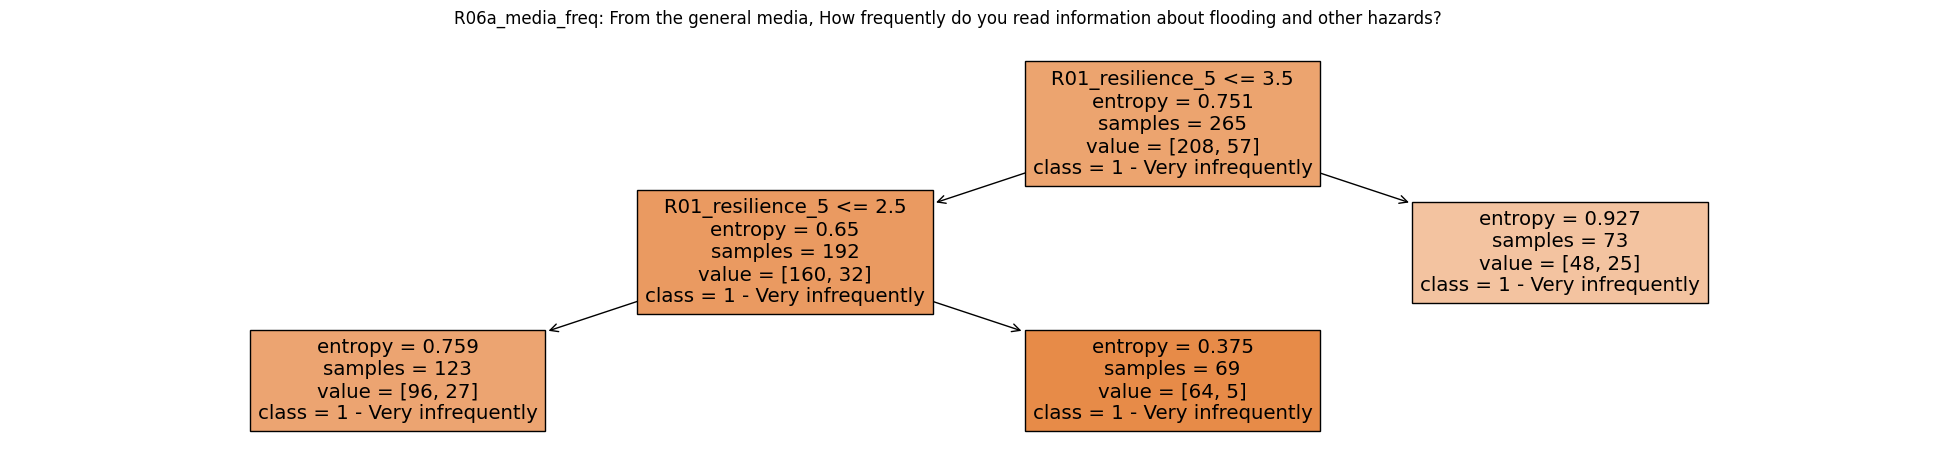

Processing aim: R2_implementation_NM4: Being an active member in a community group aimed at making the community safer
Processing aim: R2_implementation_NM5: Coordinating with the neighbors in case you are not home when a flood occurs, they would know what to do
Processing aim: R2_implementation_SM3: Reconstructing or reinforcing the walls and/or the ground floor with water-resistant materials


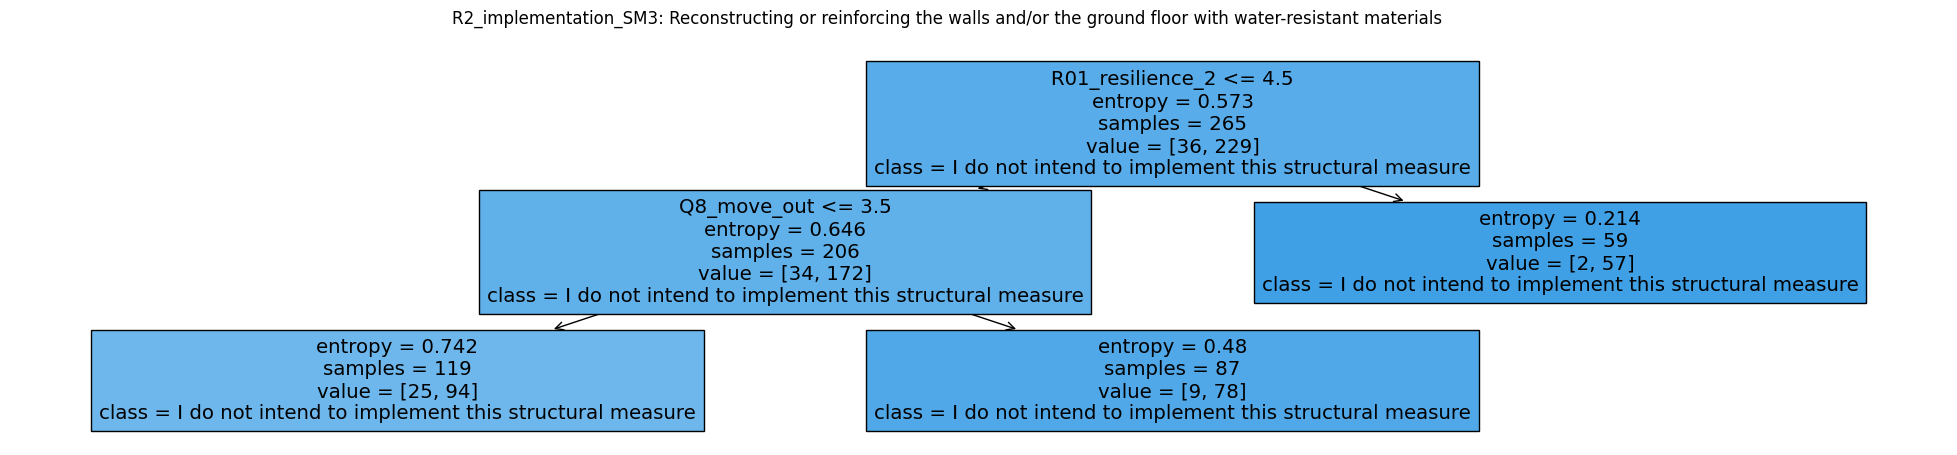

Males living in the Netherlands
Processing aim: R06a_media_freq: From the general media
Processing aim: R2_implementation_NM4: Being an active member in a community group aimed at making the community safer
Processing aim: R2_implementation_NM5: Coordinating with the neighbors in case you are not home when a flood occurs, they would know what to do
Processing aim: R2_implementation_SM3: Reconstructing or reinforcing the walls and/or the ground floor with water-resistant materials
Females living in the Netherlands
Processing aim: R06a_media_freq: From the general media
Processing aim: R2_implementation_NM4: Being an active member in a community group aimed at making the community safer
Processing aim: R2_implementation_NM5: Coordinating with the neighbors in case you are not home when a flood occurs, they would know what to do
Processing aim: R2_implementation_SM3: Reconstructing or reinforcing the walls and/or the ground floor with water-resistant materials
People living in the Netherl

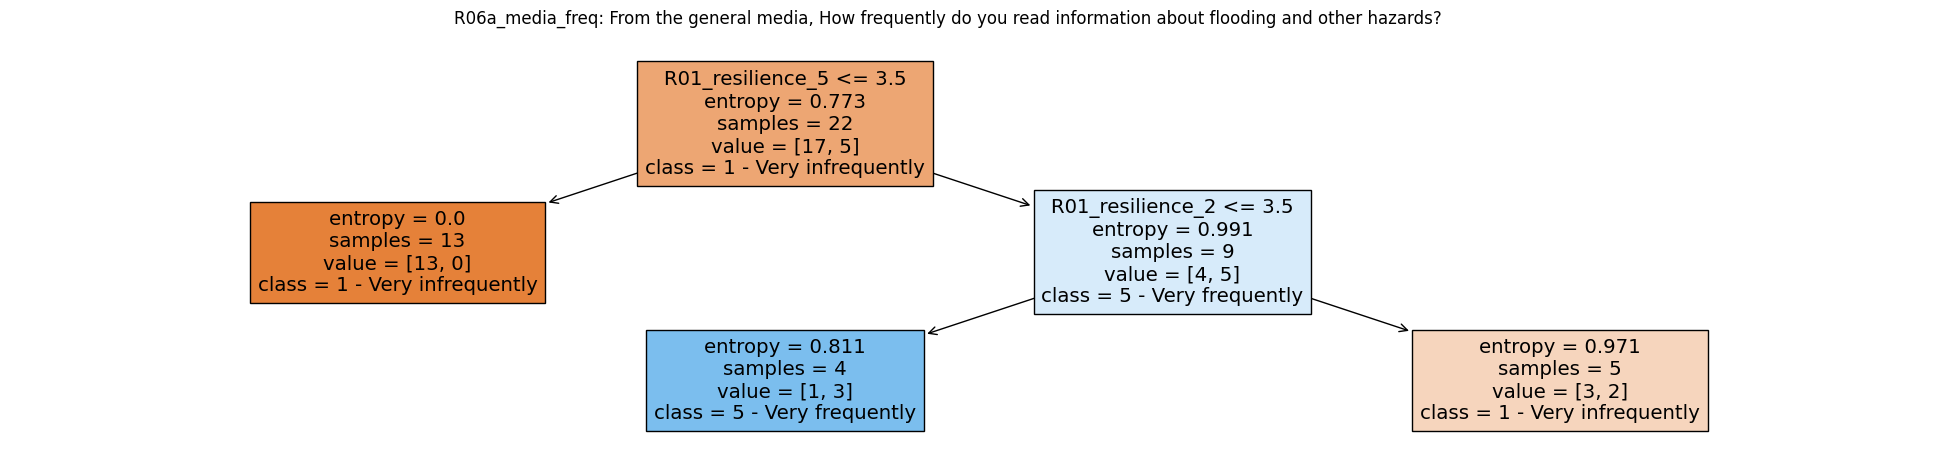

Processing aim: R2_implementation_NM4: Being an active member in a community group aimed at making the community safer


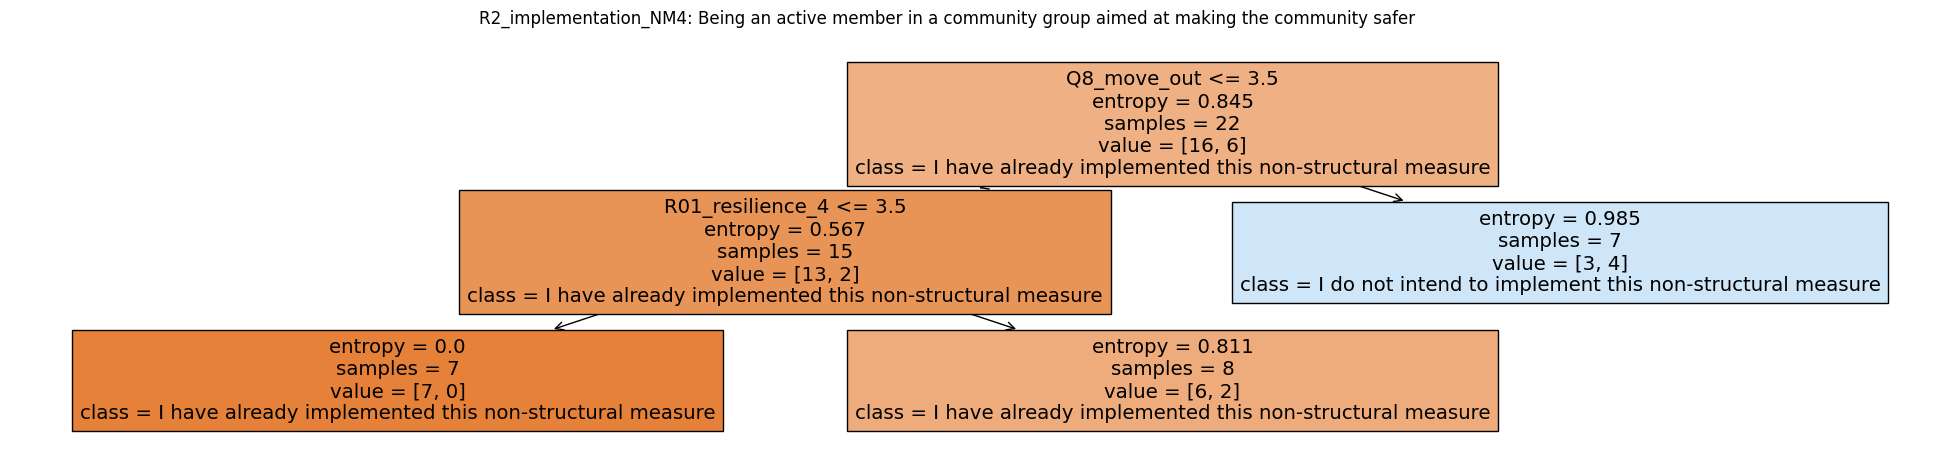

Processing aim: R2_implementation_NM5: Coordinating with the neighbors in case you are not home when a flood occurs, they would know what to do


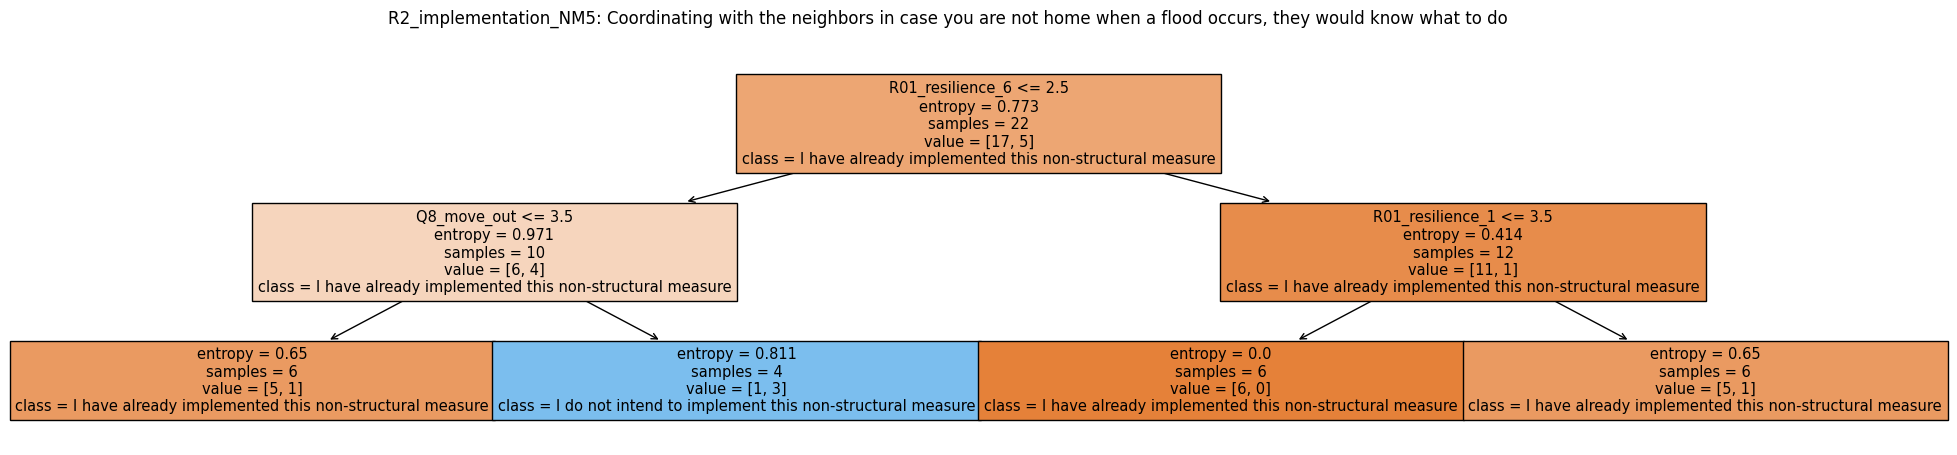

Processing aim: R2_implementation_SM3: Reconstructing or reinforcing the walls and/or the ground floor with water-resistant materials


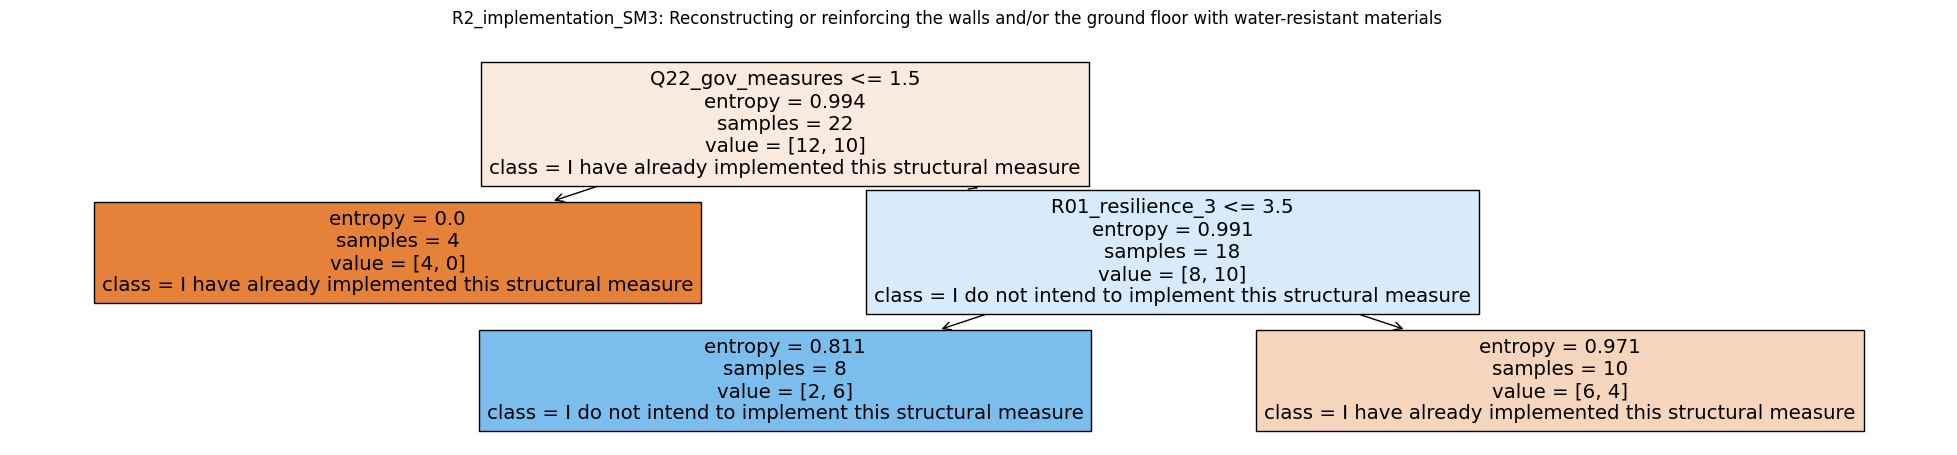

People living in the Netherlands that have completed highschool
Processing aim: R06a_media_freq: From the general media
Processing aim: R2_implementation_NM4: Being an active member in a community group aimed at making the community safer
Processing aim: R2_implementation_NM5: Coordinating with the neighbors in case you are not home when a flood occurs, they would know what to do
Processing aim: R2_implementation_SM3: Reconstructing or reinforcing the walls and/or the ground floor with water-resistant materials
People living in the Netherlands with at least a college degree
Processing aim: R06a_media_freq: From the general media
Processing aim: R2_implementation_NM4: Being an active member in a community group aimed at making the community safer
Processing aim: R2_implementation_NM5: Coordinating with the neighbors in case you are not home when a flood occurs, they would know what to do
Processing aim: R2_implementation_SM3: Reconstructing or reinforcing the walls and/or the ground flo

,Attribute,Aim,Aim_description,Aim_resp,Total_count,Aim_%_True,Condition1,Condition1_description,Condition1_resp,Condition1_count,Condition1_Aim_%,Condition2,Condition2_description,Condition2_resp,Condition2_count,Condition2_Aim_%,final_entropy
0,People living in the Netherlands,R06a_media_freq,"From the general media, How frequently do you ...",1 - Very infrequently,674,0.774481,R01_resilience_5,My household can rely on the support of family...,"1 - Strongly agree, 2, 3",501,0.818363,Q24_perc_prob_change,Do you expect that the risk of flooding in you...,"Stay the same, Decrease",275,0.861818,0.579457
1,People aged under 45 in the Netherlands,R06a_media_freq,"From the general media, How frequently do you ...",1 - Very infrequently,409,0.775061,R01_resilience_6,My household can rely on the support from my g...,"1 - Strongly agree, 2, 3",288,0.829861,Q24_perc_prob_change,Do you expect that the risk of flooding in you...,"Stay the same, Decrease",163,0.858896,0.587124
2,People aged over 45 in the Netherlands,R06a_media_freq,"From the general media, How frequently do you ...",1 - Very infrequently,265,0.784906,R01_resilience_5,My household can rely on the support of family...,"1 - Strongly agree, 2, 3",192,0.833333,R01_resilience_5,My household can rely on the support of family...,"3, 4, 5 - Strongly disagree",69,0.927536,0.375051
3,People aged over 45 in the Netherlands,R2_implementation_SM3,Reconstructing or reinforcing the walls and/or...,I do not intend to implement this structural m...,265,0.864151,"(None,)",None,,265,0.864151,"(None,)",None,,265,0.864151,0.573264
4,People aged over 45 in the Netherlands,R2_implementation_SM3,Reconstructing or reinforcing the walls and/or...,I do not intend to implement this structural m...,265,0.864151,R01_resilience_2,"During times of hardship, my household can cha...","1 - Strongly agree, 2, 3, 4",206,0.834951,Q8_move_out,How much longer are you planning on staying in...,More than 10 years,87,0.896552,0.479832
5,People aged over 45 in the Netherlands,R2_implementation_SM3,Reconstructing or reinforcing the walls and/or...,I do not intend to implement this structural m...,265,0.864151,R01_resilience_2,"During times of hardship, my household can cha...",5 - Strongly disagree,59,0.966102,"(None,)",None,,59,0.966102,0.213580
6,Females living in the Netherlands,R06a_media_freq,"From the general media, How frequently do you ...",1 - Very infrequently,313,0.785942,R01_resilience_6,My household can rely on the support from my g...,"1 - Strongly agree, 2, 3",215,0.841860,Q24_perc_prob_change,Do you expect that the risk of flooding in you...,"Stay the same, Decrease",116,0.862069,0.578795
7,People living in the Netherlands that have not...,R06a_media_freq,"From the general media, How frequently do you ...",1 - Very infrequently,22,0.772727,R01_resilience_5,My household can rely on the support of family...,"4, 5 - Strongly disagree",13,1.000000,"(None,)",None,,13,1.000000,0.000000
8,People living in the Netherlands that have not...,R2_implementation_NM4,Being an active member in a community group ai...,I have already implemented this non-structural...,22,0.727273,Q8_move_out,How much longer are you planning on staying in...,More than 10 years,15,0.866667,"(None,)",None,,15,0.866667,0.566510
9,People living in the Netherlands that have not...,R2_implementation_NM4,Being an active member in a community group ai...,I have already implemented this non-structural...,22,0.727273,Q8_move_out,How much longer are you planning on staying in...,"I am looking to move in 1 year or less, 1-5 ye...",15,0.866667,R01_resilience_4,"During times of hardship, my household can acc...","4, 5 - Strongly disagree",7,1.000000,0.000000


In [36]:
#You can change these values:
entropy_threshold = 0.5 #How much entropy can the node have (yes aim:no aim) to be considered?
sample_threshold = 0.2 #What proportion of the original sample size to be considered?

#create a table that will be filled by selected combinations of aims and conditions with the relevant information for further processing 
statement_questions = pd.DataFrame(columns = ['Attribute', 
                                              'Aim', 'Aim_description', 'Aim_resp', 'Total_count', 'Aim_%_True', 
                                              'Condition1', 'Condition1_description', 'Condition1_resp', 'Condition1_count', 'Condition1_Aim_%', 
                                              'Condition2', 'Condition2_description', 'Condition2_resp', 'Condition2_count', 'Condition2_Aim_%',
                                              'final_entropy'])

responses_demographic1 = adjusted_responses[adjusted_responses["Q0_age"] <= 3] #Aged under 45
responses_demographic2 = adjusted_responses[adjusted_responses["Q0_age"] > 3] #Aged over 45
responses_demographic3 = adjusted_responses[adjusted_responses["Q0_gender"] == 1] #Male
responses_demographic4 = adjusted_responses[adjusted_responses["Q0_gender"] == 2] #Female
responses_demographic5 = adjusted_responses[adjusted_responses["Q0_education_NL"] == 1] #Not completed Highschool
responses_demographic6 = adjusted_responses[adjusted_responses["Q0_education_NL"] == 2] #Completed Highschool
responses_demographic7 = adjusted_responses[adjusted_responses["Q0_education_NL"] >= 3] #Has some form of college degree


statement_questions =  select_statements(chosen_aims, adjusted_responses, statement_questions, "People living in the Netherlands", entropy_threshold, sample_threshold)
statement_questions =  select_statements(chosen_aims, responses_demographic1, statement_questions, "People aged under 45 in the Netherlands", entropy_threshold, sample_threshold)
statement_questions =  select_statements(chosen_aims, responses_demographic2, statement_questions, "People aged over 45 in the Netherlands", entropy_threshold, sample_threshold)
statement_questions =  select_statements(chosen_aims, responses_demographic3, statement_questions, "Males living in the Netherlands", entropy_threshold, sample_threshold)
statement_questions =  select_statements(chosen_aims, responses_demographic4, statement_questions, "Females living in the Netherlands", entropy_threshold, sample_threshold)
statement_questions =  select_statements(chosen_aims, responses_demographic5, statement_questions, "People living in the Netherlands that have not completed highschool", entropy_threshold, sample_threshold)
statement_questions =  select_statements(chosen_aims, responses_demographic6, statement_questions, "People living in the Netherlands that have completed highschool", entropy_threshold, sample_threshold)
statement_questions =  select_statements(chosen_aims, responses_demographic7, statement_questions, "People living in the Netherlands with at least a college degree", entropy_threshold, sample_threshold)

display(statement_questions)

# Save the DataFrame to a CSV file
statement_questions.to_csv("tree_selected_statements.csv", index=False)

AI - IG Statement generator:


In [53]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_groq import ChatGroq
from langchain_openai import ChatOpenAI

import sys
import json
# Add the parent directory to the path
sys.path.append('..')

# Now you can import the config module
from config import groqkey, OPENAI_Key

In [54]:
# Load the DataFrame from a CSV file
statement_questions = pd.read_csv("tree_selected_statements.csv")
edited_statement_questions = pd.DataFrame(columns=['Attribute', 'Aim', 'Condition1', 'Condition2'])
edited_statement_questions['Attribute'] = statement_questions['Attribute'].copy()  
edited_statement_questions.loc[:, 'Aim'] = statement_questions['Aim_description'] + " Response: " + statement_questions['Aim_resp'] 
edited_statement_questions.loc[:, 'Condition1'] = statement_questions['Condition1_description']  + " Response: " + statement_questions['Condition1_resp']
edited_statement_questions.loc[:, 'Condition2'] = statement_questions['Condition2_description']  + " Response: " + statement_questions['Condition2_resp']

# Convert the DataFrame to JSON text
json_text = edited_statement_questions.to_json()

# Print the JSON text
print(json_text)

{"Attribute":{"0":"People aged under 45 in the Netherlands","1":"People aged under 45 in the Netherlands","2":"People aged under 45 in the Netherlands","3":"People aged over 45 in the Netherlands","4":"People aged over 45 in the Netherlands","5":"Males living in the Netherlands","6":"Males living in the Netherlands","7":"Females living in the Netherlands","8":"People living in the Netherlands that have not completed highschool","9":"People living in the Netherlands that have not completed highschool","10":"People living in the Netherlands that have not completed highschool","11":"People living in the Netherlands that have completed highschool","12":"People living in the Netherlands that have completed highschool","13":"People living in the Netherlands that have completed highschool","14":"People living in the Netherlands that have completed highschool"},"Aim":{"0":"Being an active member in a community group aimed at making the community safer, Please indicate if you have already imple

In [55]:
##Json Approach

statlist = []
# models = ["gemma-7b-it", "llama3-8b-8192", "mixtral-8x7b-32768", "llama3-70b-8192"]
# llm = ChatGroq(temperature=0, model=models[1], api_key=groqkey)
models = ["gpt-3.5-turbo-0125", "gpt-4o"]
llm = ChatOpenAI(temperature=0, model=models[1], api_key=OPENAI_Key)


"""Here is an example: "Attribute": "People", "Aim":"do this specific action", "Condition1": "if this condition is met", "Condition2": "and this condition is met" """

def ExampleCompletionFunction(request):
    system = """You are a json interpreter that transforms survey questions and responses into structured statements depicting a group action influenced by specific conditions.
           
                The input json will have the following variables:
                'Attribute':The demographic of the survey responses, 
                'Aim': the action question the responders were asked and the aggregated response to the aim, 
                'Condition1': the first related condition question the responders were asked and the aggregated response to the first condition question, 
                'Condition2': the second related condition question the responders were asked and the aggregated response to the second condition question, 

                You can only provide responses in JSON format.
                You rewrite the provided json to make the following keys of your output json: 
                "Attribute": "Attribute", 
                "Aim": Combine and rewrite 'Aim' as an action (starting with Base Form/Infinitive verb), 
                "Condition1": "if" + Combine and rewrite 'Condition1' as a condition that should be met (3rd-person/they), 
                "Condition2": "and if" + Combine and rewrite 'Condition2' as a condition that should be met (3rd-person/they)
                
                I should be able to combine your output Attribute + Aim + Condition1 + Condition2 to form a full 3rd-person sentence that describes the behaviour of the demogrpahic. 
                Be concise but do not simplify or generalise the actions and conditions.  
                Keep negative language.
                You should treat every object separately and produce the same number of objects as have been provided.
                """
    human = "{text}"
    prompt  = ChatPromptTemplate.from_messages([("system", system), ("human", human)])

    chain = prompt | llm
    response = chain.invoke({"text": request})
    return response.content

IG_Statement = ExampleCompletionFunction(json_text)
print(IG_Statement)
statlist.append(IG_Statement)

```json
[
    {
        "Attribute": "People aged under 45 in the Netherlands",
        "Aim": "be an active member in a community group aimed at making the community safer",
        "Condition1": "if they have ever personally experienced a flood of any kind",
        "Condition2": "and if their household can rely on the support of family and friends when they need help"
    },
    {
        "Attribute": "People aged under 45 in the Netherlands",
        "Aim": "coordinate with the neighbors in case they are not home when a flood occurs",
        "Condition1": "if they have ever personally experienced a flood of any kind",
        "Condition2": "and if they own their accommodation"
    },
    {
        "Attribute": "People aged under 45 in the Netherlands",
        "Aim": "reconstruct or reinforce the walls and/or the ground floor with water-resistant materials",
        "Condition1": "if they have ever personally experienced a flood of any kind",
        "Condition2": "and if during t

In [56]:
df = pd.DataFrame(columns=["Attribute","Aim","Condition1", "Condition2"])
try:
    # Parse the JSON string into a Python dictionary
    data_dict = json.loads(IG_Statement)
except:
    # Parse the JSON string into a Python dictionary
    data_dict = json.loads('['+IG_Statement.split('[')[1].split(']')[0]+']')        

# Convert the dictionary to a DataFrame
# Since we have only one record, we wrap it in a list to make a single-row DataFrame
IG_component_df = pd.DataFrame(data_dict)

display(IG_component_df)

,Attribute,Aim,Condition1,Condition2
0,People aged under 45 in the Netherlands,be an active member in a community group aimed...,if they have ever personally experienced a flo...,and if their household can rely on the support...
1,People aged under 45 in the Netherlands,coordinate with the neighbors in case they are...,if they have ever personally experienced a flo...,and if they own their accommodation
2,People aged under 45 in the Netherlands,reconstruct or reinforce the walls and/or the ...,if they have ever personally experienced a flo...,"and if during times of hardship, their househo..."
3,People aged over 45 in the Netherlands,read information about flooding and other hazards,if their household can rely on the support of ...,and if their household can rely on the support...
4,People aged over 45 in the Netherlands,reconstruct or reinforce the walls and/or the ...,if they have ever personally experienced a flo...,"and if during times of hardship, their househo..."
5,Males living in the Netherlands,be an active member in a community group aimed...,"if during times of hardship, their household c...",and if hardships or natural disasters became m...
6,Males living in the Netherlands,reconstruct or reinforce the walls and/or the ...,if they have ever personally experienced a flo...,and if hardships or natural disasters became m...
7,Females living in the Netherlands,coordinate with the neighbors in case they are...,if they expect that the risk of flooding in th...,and if null
8,People living in the Netherlands that have not...,read information about flooding and other hazards,if their household can rely on the support of ...,and if null
9,People living in the Netherlands that have not...,be an active member in a community group aimed...,"if they are looking to move in 1 year or less,...","and if during times of hardship, their househo..."


In [57]:
statement_questions

,Attribute,Aim,Aim_description,Aim_resp,Total_count,Aim_%_True,Condition1,Condition1_description,Condition1_resp,Condition1_count,Condition1_Aim_%,Condition2,Condition2_description,Condition2_resp,Condition2_count,Condition2_Aim_%,final_entropy
0,People aged under 45 in the Netherlands,R2_implementation_NM4,Being an active member in a community group ai...,I have already implemented this non-structural...,409,0.537897,Q18_flood_exp,Have you ever personally experienced a flood o...,Yes,77,0.831169,R01_resilience_5,My household can rely on the support of family...,"2, 3, 4, 5 - Strongly disagree",15,1.000000,0.000000
1,People aged under 45 in the Netherlands,R2_implementation_NM5,Coordinating with the neighbors in case you ar...,I have already implemented this non-structural...,409,0.581907,Q18_flood_exp,Have you ever personally experienced a flood o...,Yes,77,0.831169,Q5_home_tenure,Do you rent or own your accommodation?,Own,41,0.926829,0.377646
2,People aged under 45 in the Netherlands,R2_implementation_SM3,Reconstructing or reinforcing the walls and/or...,I have already implemented this structural mea...,409,0.457213,Q18_flood_exp,Have you ever personally experienced a flood o...,Yes,77,0.831169,R01_resilience_4,"During times of hardship, my household can acc...","3, 4, 5 - Strongly disagree",56,0.928571,0.371232
3,People aged over 45 in the Netherlands,R06a_media_freq,"From the general media, How frequently do you ...",1 - Very infrequently,265,0.784906,R01_resilience_5,My household can rely on the support of family...,"1 - Strongly agree, 2, 3",192,0.833333,R01_resilience_5,My household can rely on the support of family...,"3, 4, 5 - Strongly disagree",69,0.927536,0.375051
4,People aged over 45 in the Netherlands,R2_implementation_SM3,Reconstructing or reinforcing the walls and/or...,I do not intend to implement this structural m...,265,0.864151,Q18_flood_exp,Have you ever personally experienced a flood o...,No,237,0.898734,R01_resilience_2,"During times of hardship, my household can cha...",5 - Strongly disagree,51,1.000000,0.000000
5,Males living in the Netherlands,R2_implementation_NM4,Being an active member in a community group ai...,I do not intend to implement this non-structur...,361,0.493075,R01_resilience_4,"During times of hardship, my household can acc...",5 - Strongly disagree,31,0.806452,R01_resilience_3,If hardships or natural disasters became more ...,"2, 3, 4, 5 - Strongly disagree",5,1.000000,0.000000
6,Males living in the Netherlands,R2_implementation_SM3,Reconstructing or reinforcing the walls and/or...,I have already implemented this structural mea...,361,0.360111,Q18_flood_exp,Have you ever personally experienced a flood o...,Yes,61,0.688525,R01_resilience_3,If hardships or natural disasters became more ...,"4, 5 - Strongly disagree",20,0.950000,0.286397
7,Females living in the Netherlands,R2_implementation_NM5,Coordinating with the neighbors in case you ar...,I have already implemented this non-structural...,313,0.587859,Q24_perc_prob_change,Do you expect that the risk of flooding in you...,Decrease,17,1.000000,"(None,)",NaN,NaN,17,1.000000,0.000000
8,People living in the Netherlands that have not...,R06a_media_freq,"From the general media, How frequently do you ...",1 - Very infrequently,22,0.772727,R01_resilience_5,My household can rely on the support of family...,"4, 5 - Strongly disagree",13,1.000000,"(None,)",NaN,NaN,13,1.000000,0.000000
9,People living in the Netherlands that have not...,R2_implementation_NM4,Being an active member in a community group ai...,I have already implemented this non-structural...,22,0.727273,Q8_move_out,How much longer are you planning on staying in...,"I am looking to move in 1 year or less, 1-5 ye...",15,0.866667,R01_resilience_4,"During times of hardship, my household can acc...","4, 5 - Strongly disagree",7,1.000000,0.000000


In [60]:
# Make final file
statements_stats = pd.concat([
                                 IG_component_df['Attribute'], 
                                 IG_component_df['Aim'], 
                                 statement_questions[['Total_count', 'Aim_%_True']],
                                 IG_component_df['Condition1'], 
                                 statement_questions[['Condition1_count', 'Condition1_Aim_%',]],
                                 IG_component_df['Condition2'],
                                 statement_questions[['Condition2_count', 'Condition2_Aim_%']], 
                                 ], axis=1)


# Create a Pandas Excel writer using XlsxWriter as the engine
writer = pd.ExcelWriter('SelectedandConvertedStatements.xlsx', engine='xlsxwriter')

# Write each dataframe to a different worksheet
statements_stats.to_excel(writer, sheet_name='IGStatementStats', index=False)
statement_questions.to_excel(writer, sheet_name='QuestionResults', index=False)
IG_component_df.to_excel(writer, sheet_name='JustIGstatements', index=False)

# Close the Pandas Excel writer and output the Excel file
writer.close()

statements_stats

,Attribute,Aim,Total_count,Aim_%_True,Condition1,Condition1_count,Condition1_Aim_%,Condition2,Condition2_count,Condition2_Aim_%
0,People aged under 45 in the Netherlands,be an active member in a community group aimed...,409,0.537897,if they have ever personally experienced a flo...,77,0.831169,and if their household can rely on the support...,15,1.000000
1,People aged under 45 in the Netherlands,coordinate with the neighbors in case they are...,409,0.581907,if they have ever personally experienced a flo...,77,0.831169,and if they own their accommodation,41,0.926829
2,People aged under 45 in the Netherlands,reconstruct or reinforce the walls and/or the ...,409,0.457213,if they have ever personally experienced a flo...,77,0.831169,"and if during times of hardship, their househo...",56,0.928571
3,People aged over 45 in the Netherlands,read information about flooding and other hazards,265,0.784906,if their household can rely on the support of ...,192,0.833333,and if their household can rely on the support...,69,0.927536
4,People aged over 45 in the Netherlands,reconstruct or reinforce the walls and/or the ...,265,0.864151,if they have ever personally experienced a flo...,237,0.898734,"and if during times of hardship, their househo...",51,1.000000
5,Males living in the Netherlands,be an active member in a community group aimed...,361,0.493075,"if during times of hardship, their household c...",31,0.806452,and if hardships or natural disasters became m...,5,1.000000
6,Males living in the Netherlands,reconstruct or reinforce the walls and/or the ...,361,0.360111,if they have ever personally experienced a flo...,61,0.688525,and if hardships or natural disasters became m...,20,0.950000
7,Females living in the Netherlands,coordinate with the neighbors in case they are...,313,0.587859,if they expect that the risk of flooding in th...,17,1.000000,and if null,17,1.000000
8,People living in the Netherlands that have not...,read information about flooding and other hazards,22,0.772727,if their household can rely on the support of ...,13,1.000000,and if null,13,1.000000
9,People living in the Netherlands that have not...,be an active member in a community group aimed...,22,0.727273,"if they are looking to move in 1 year or less,...",15,0.866667,"and if during times of hardship, their househo...",7,1.000000


In [8]:
statements_stats = pd.read_excel('SelectedandConvertedStatements.xlsx', sheet_name='IGStatementStats')
statements_stats

,Attribute,Aim,Total_count,Aim_%_True,Condition1,Condition1_count,Condition1_Aim_%,Condition2,Condition2_count,Condition2_Aim_%
0,People aged under 45 in the Netherlands,be an active member in a community group aimed...,409,0.537897,if they have ever personally experienced a flo...,77,0.831169,and if their household can rely on the support...,15,1.000000
1,People aged under 45 in the Netherlands,coordinate with the neighbors in case they are...,409,0.581907,if they have ever personally experienced a flo...,77,0.831169,and if they own their accommodation,41,0.926829
2,People aged under 45 in the Netherlands,reconstruct or reinforce the walls and/or the ...,409,0.457213,if they have ever personally experienced a flo...,77,0.831169,"and if during times of hardship, their househo...",56,0.928571
3,People aged over 45 in the Netherlands,read information about flooding and other hazards,265,0.784906,if their household can rely on the support of ...,192,0.833333,and if their household can rely on the support...,69,0.927536
4,People aged over 45 in the Netherlands,reconstruct or reinforce the walls and/or the ...,265,0.864151,if they have ever personally experienced a flo...,237,0.898734,"and if during times of hardship, their househo...",51,1.000000
5,Males living in the Netherlands,be an active member in a community group aimed...,361,0.493075,"if during times of hardship, their household c...",31,0.806452,and if hardships or natural disasters became m...,5,1.000000
6,Males living in the Netherlands,reconstruct or reinforce the walls and/or the ...,361,0.360111,if they have ever personally experienced a flo...,61,0.688525,and if hardships or natural disasters became m...,20,0.950000
7,Females living in the Netherlands,coordinate with the neighbors in case they are...,313,0.587859,if they expect that the risk of flooding in th...,17,1.000000,and if null,17,1.000000
8,People living in the Netherlands that have not...,read information about flooding and other hazards,22,0.772727,if their household can rely on the support of ...,13,1.000000,and if null,13,1.000000
9,People living in the Netherlands that have not...,be an active member in a community group aimed...,22,0.727273,"if they are looking to move in 1 year or less,...",15,0.866667,"and if during times of hardship, their househo...",7,1.000000


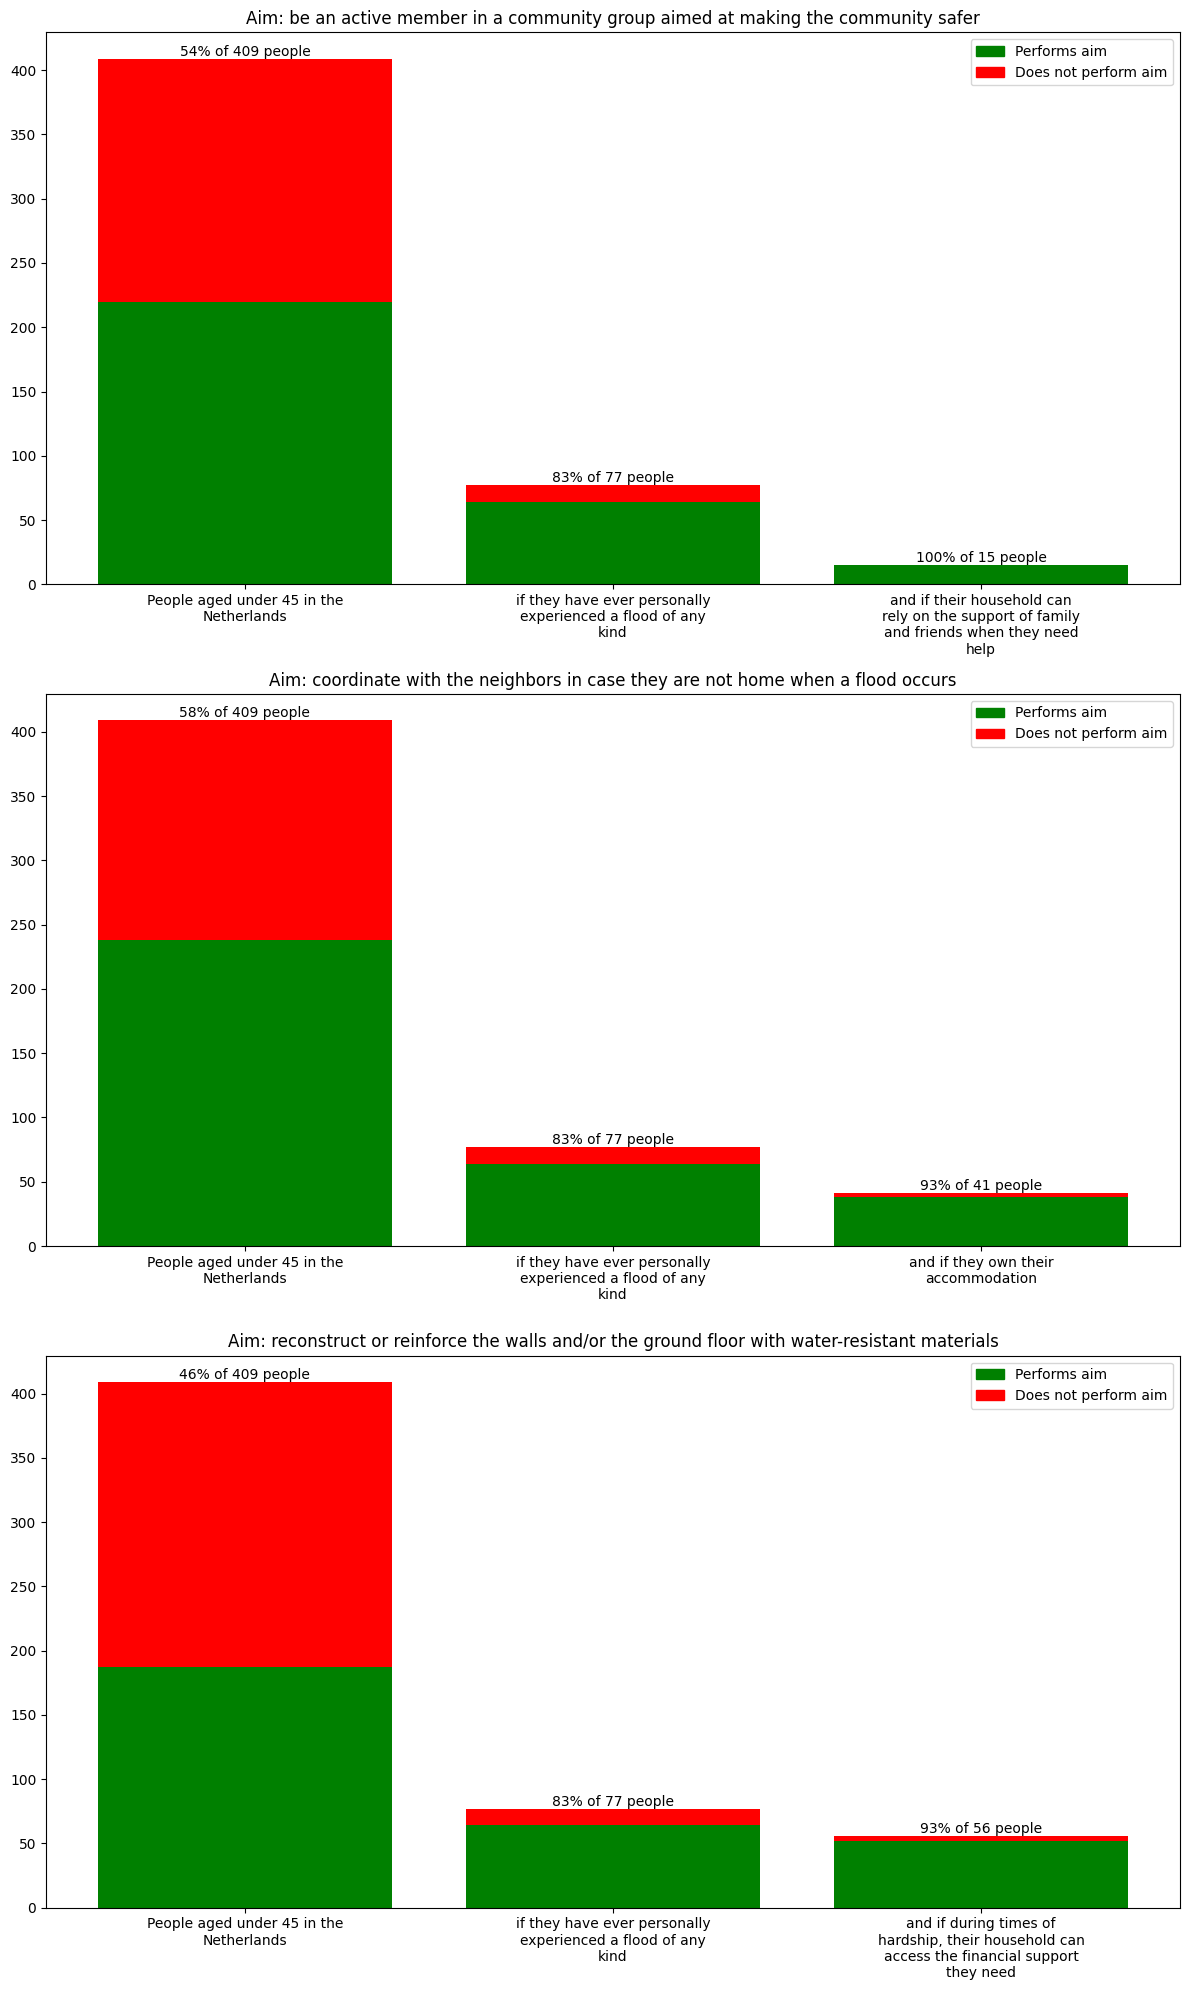

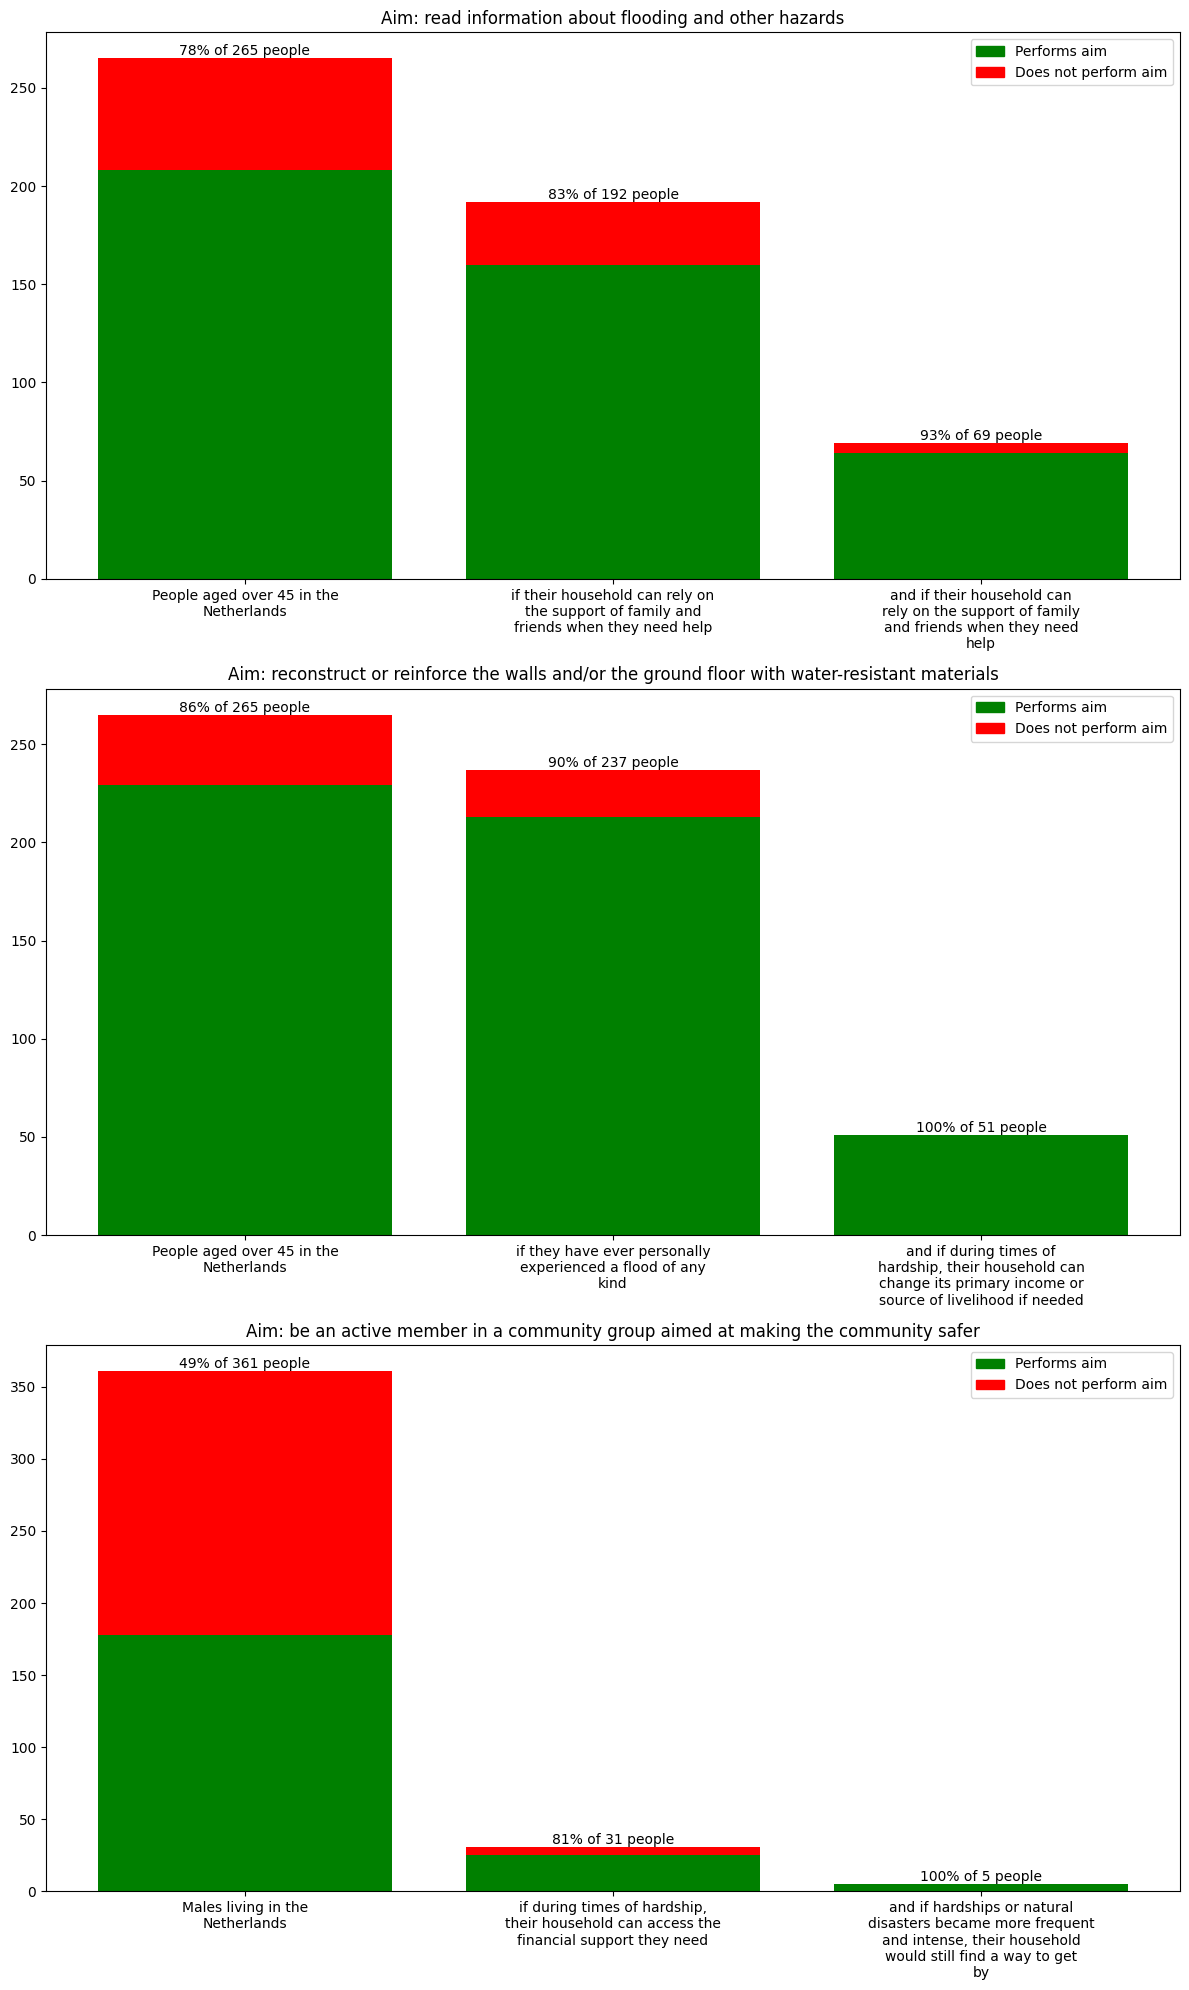

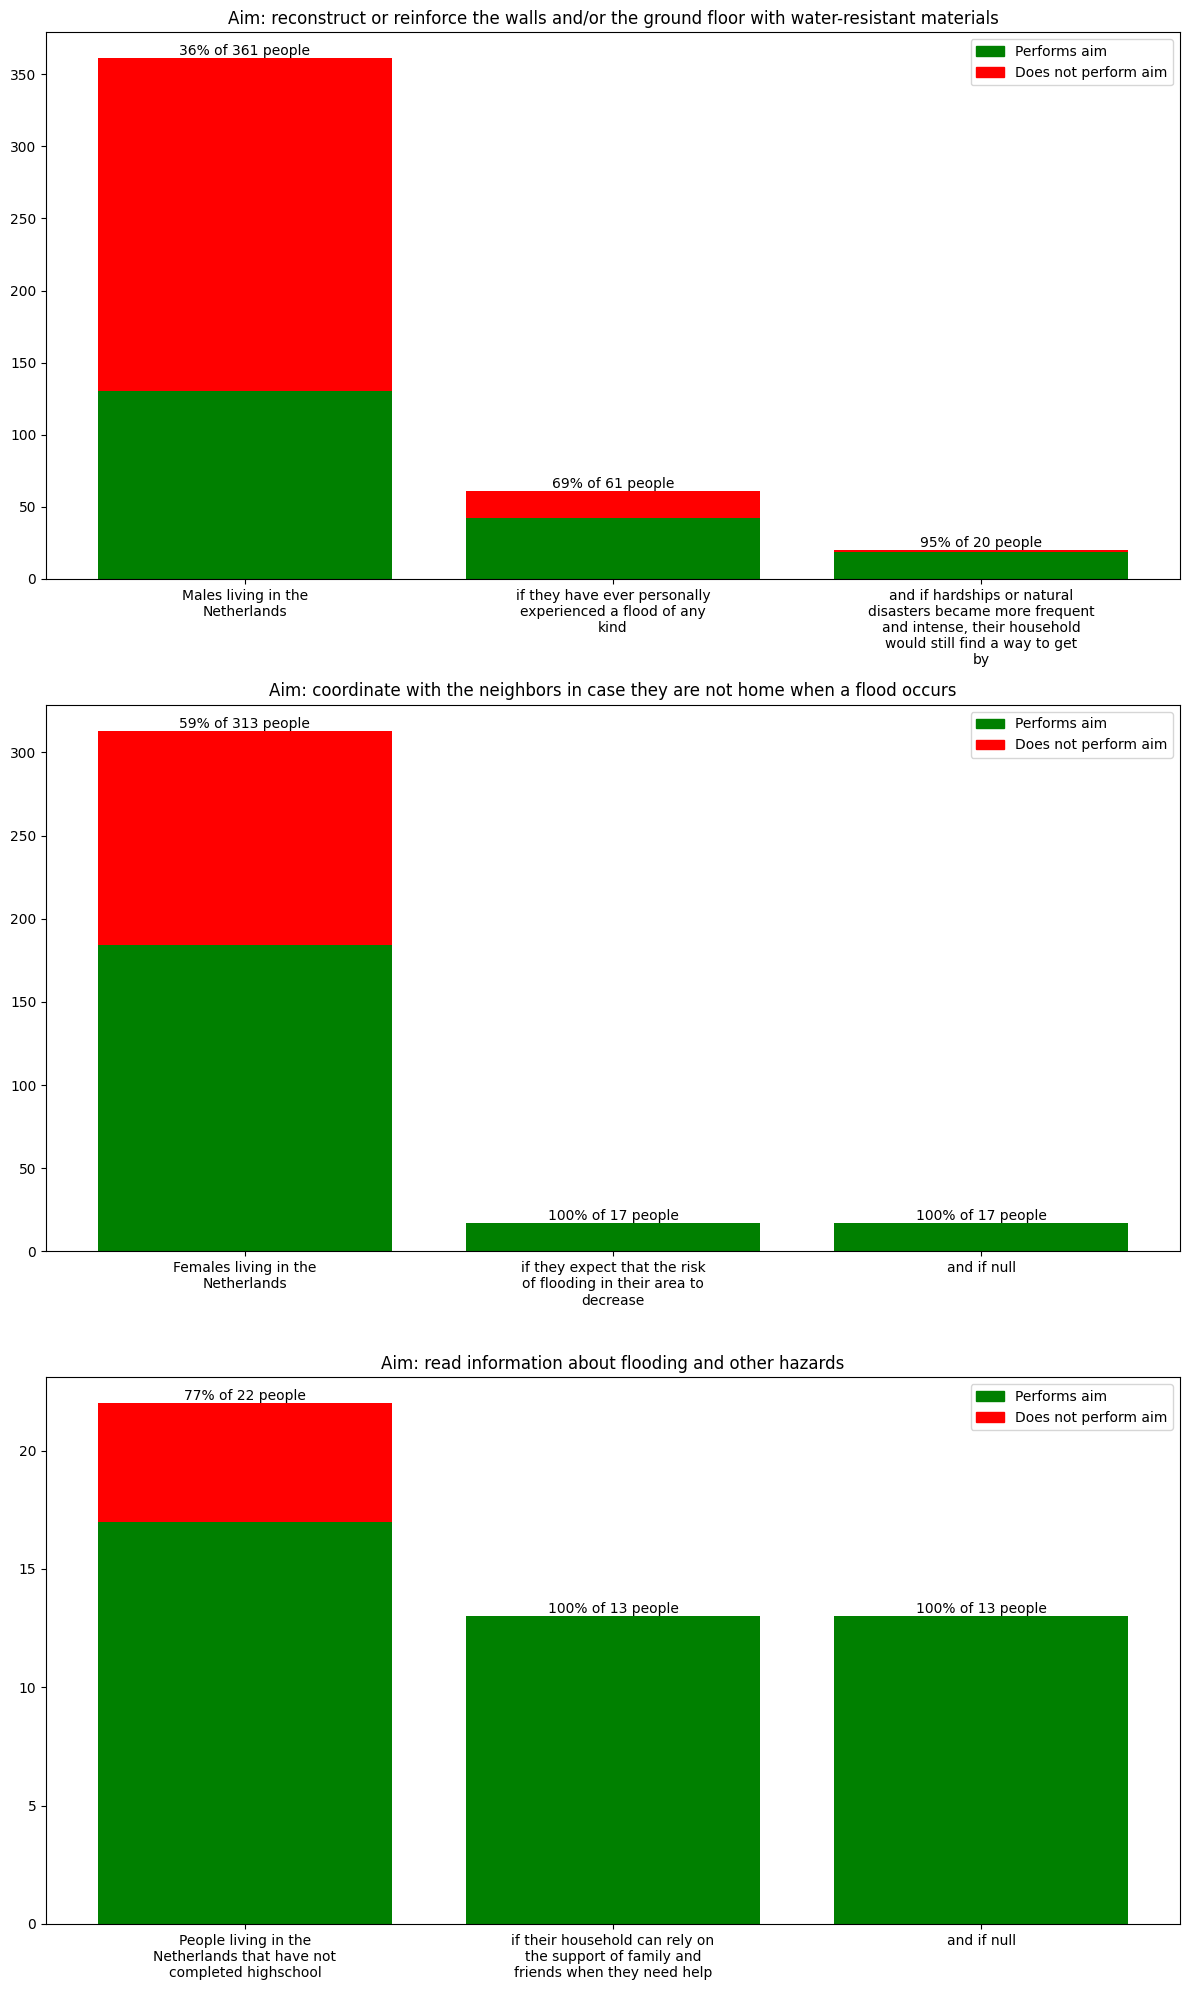

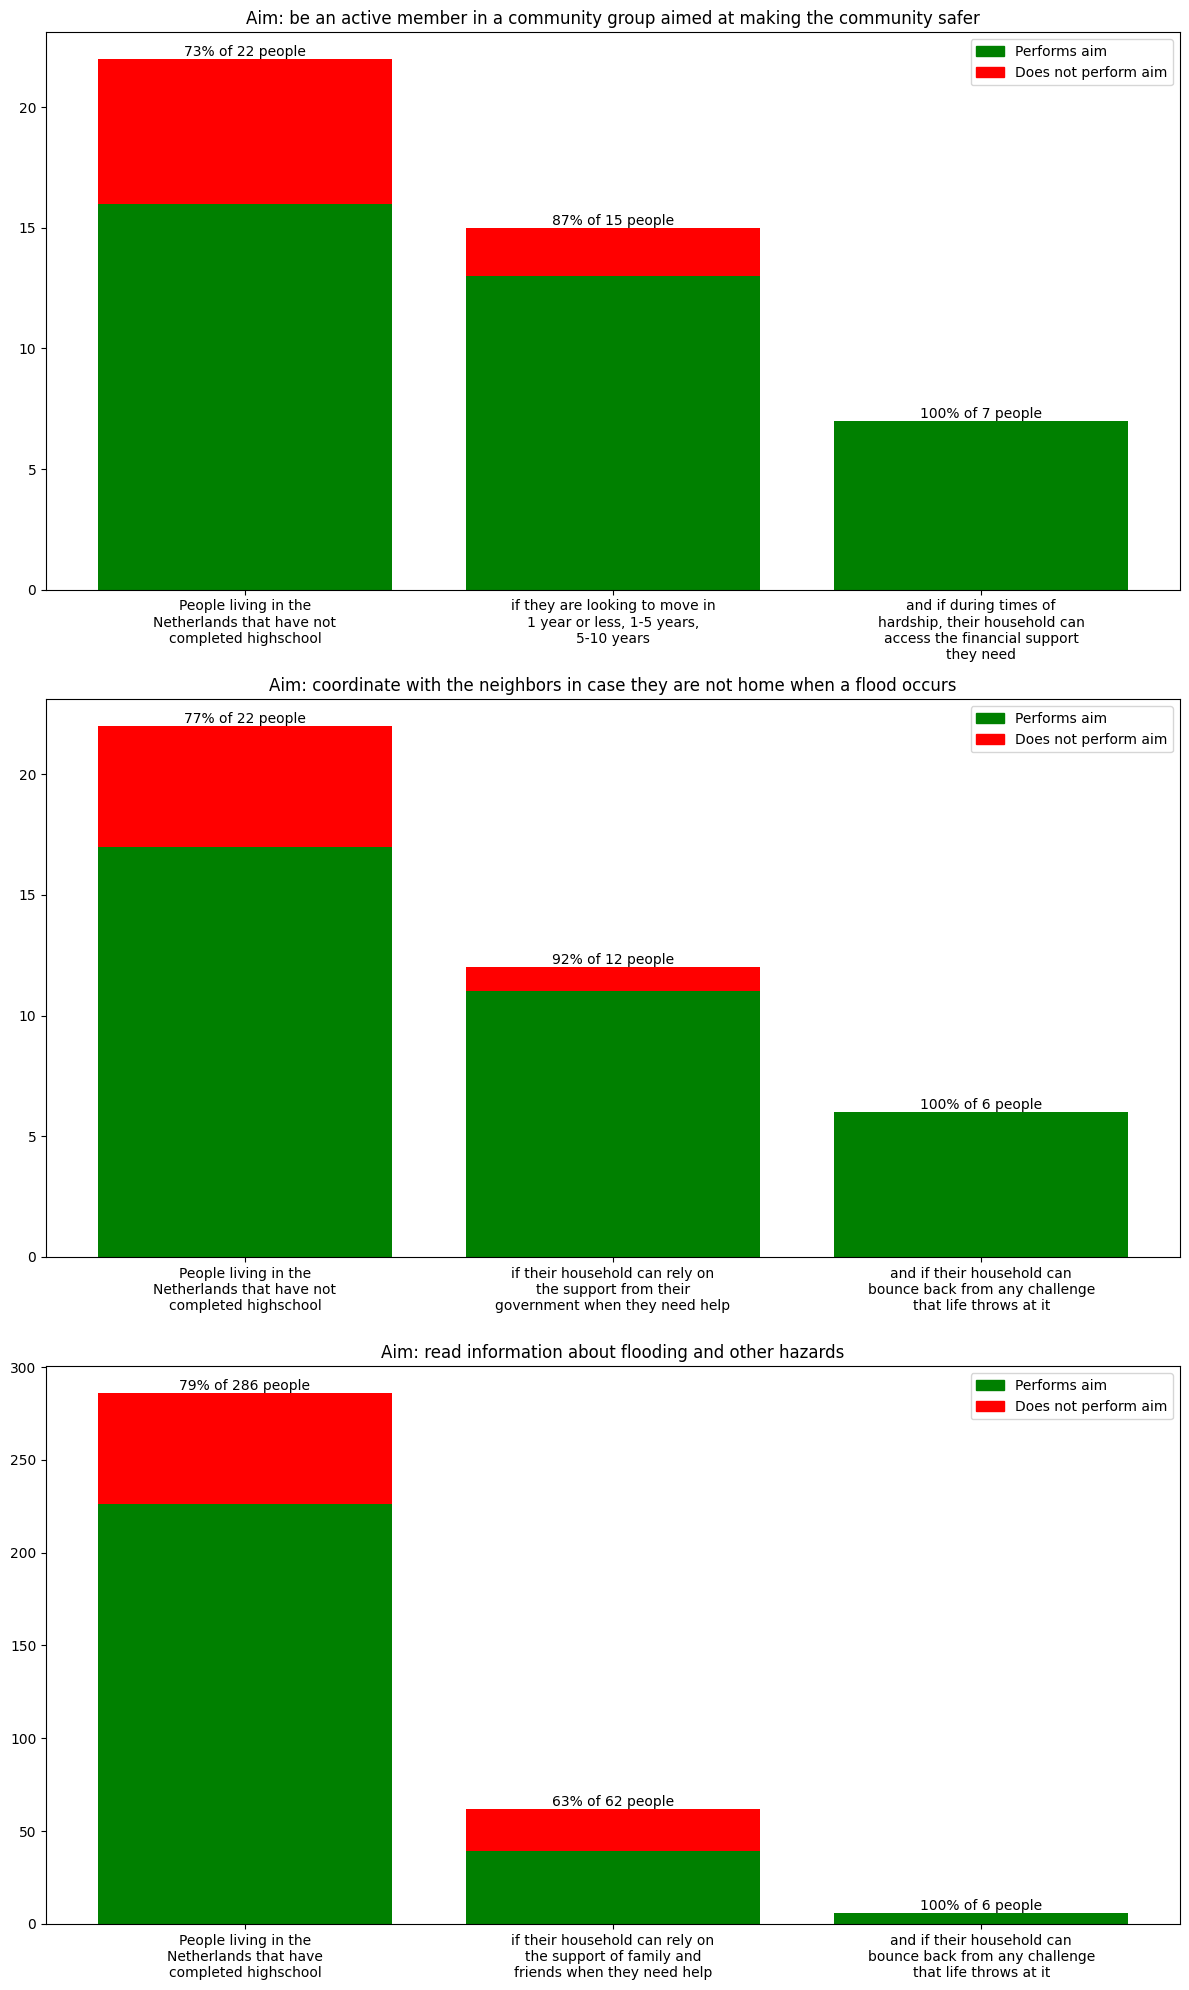

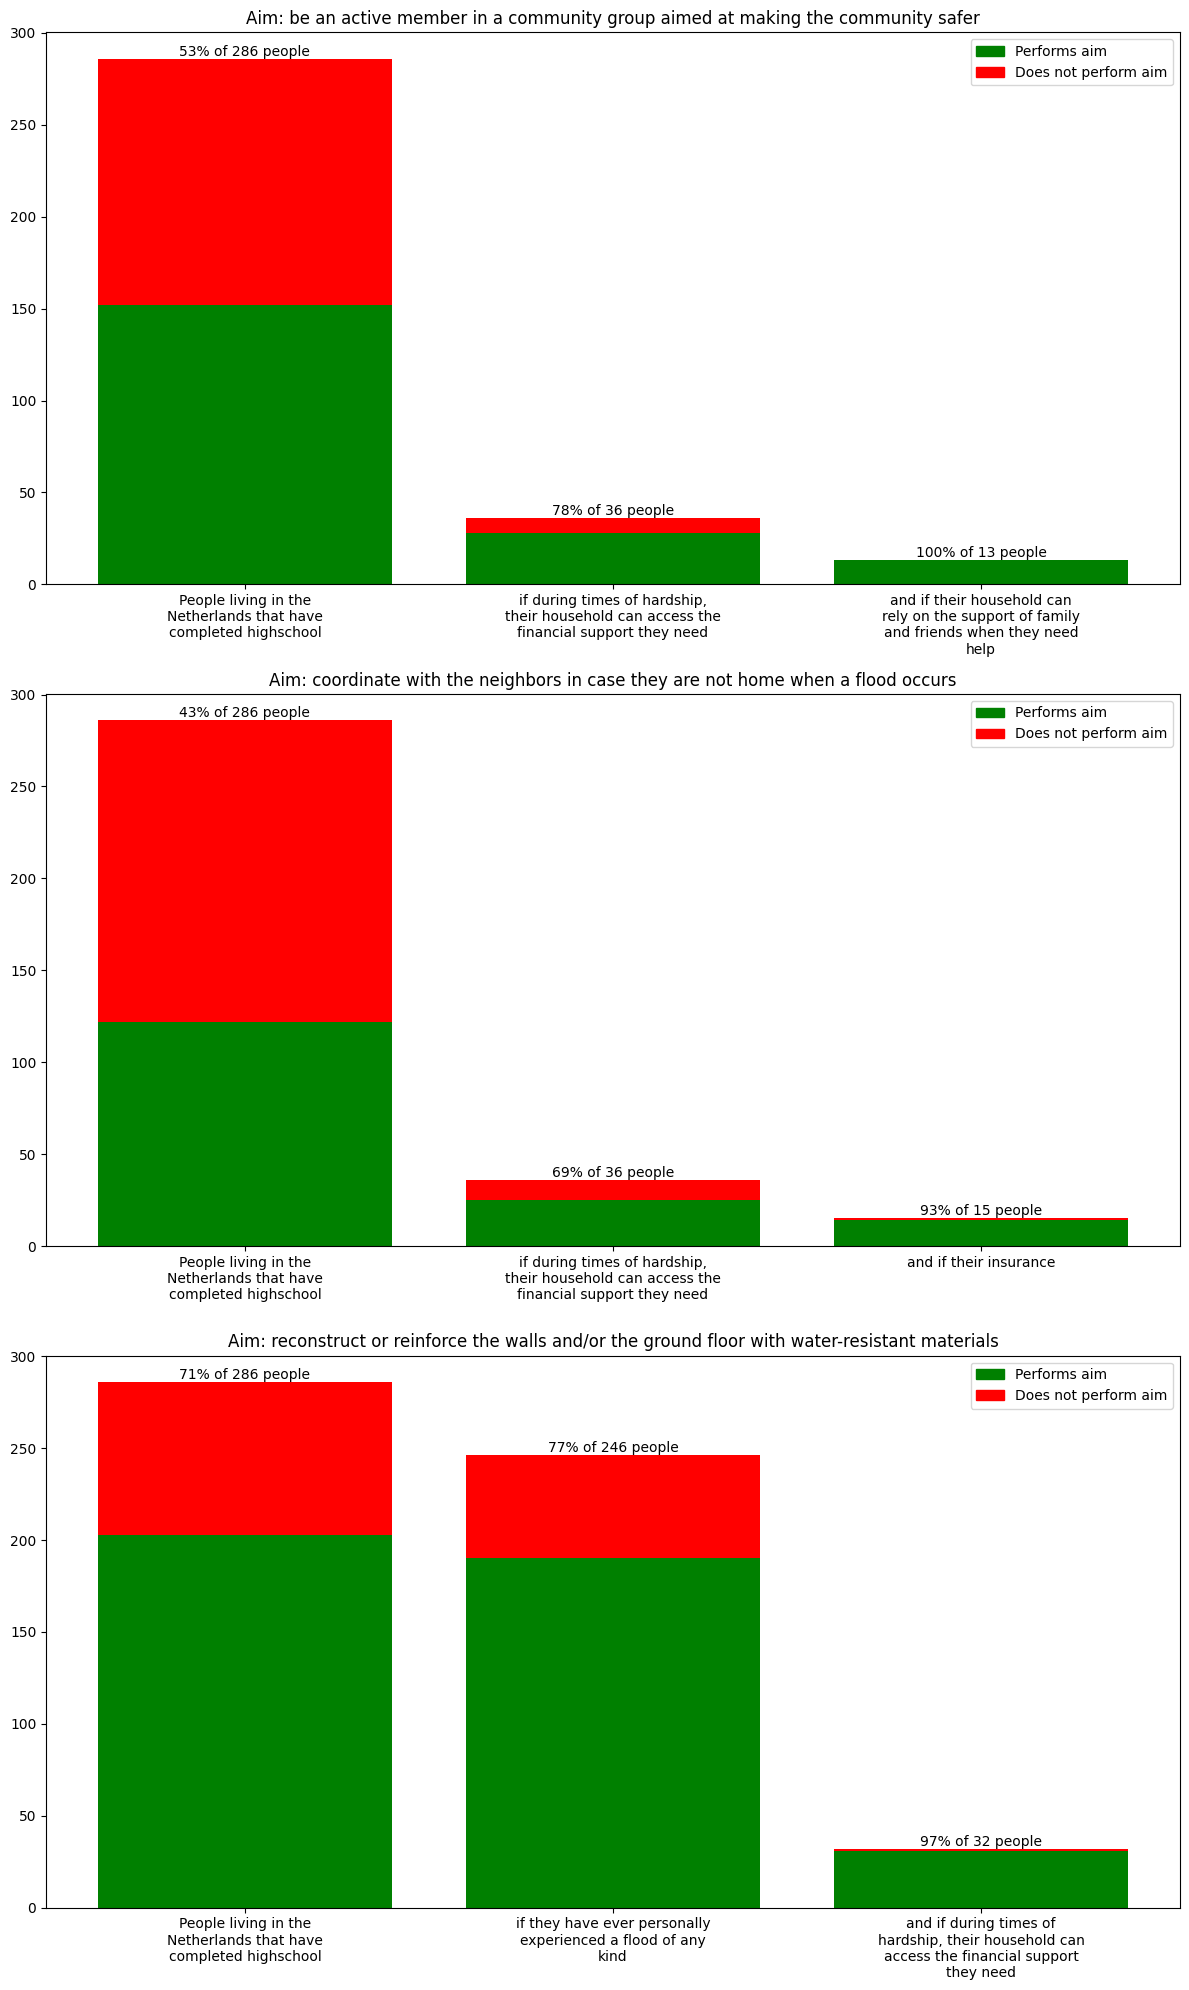

In [5]:
import textwrap
import matplotlib.patches as mpatches

rows = len(statements_stats)
# Adding legend
green_patch = mpatches.Patch(color='green', label='Performs aim')
red_patch = mpatches.Patch(color='red', label='Does not perform aim')

for startrow in range(0, rows, 3):
        fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 20))
        
        for i, row in statements_stats.iloc[startrow:min(rows, startrow+3)].iterrows():
                ax = axes[i-startrow]

                # Bar1: Total_count
                bar1 = ax.bar(row['Attribute'], row['Total_count'], color='red')
                ax.bar(row['Attribute'], row['Total_count'] * row['Aim_%_True'], color='green')
                ax.text(row['Attribute'], row['Total_count'], f"{row['Aim_%_True']*100:.0f}% of {row['Total_count']} people", 
                        color='black', ha='center', va='bottom')

                # Bar2: Condition1_count
                bar2 = ax.bar(row['Condition1'], row['Condition1_count'], color='red')
                ax.bar(row['Condition1'], row['Condition1_count'] * row['Condition1_Aim_%'], color='green')
                ax.text(row['Condition1'], row['Condition1_count'], f"{row['Condition1_Aim_%']*100:.0f}% of {row['Condition1_count']} people", 
                        color='black', ha='center', va='bottom')

                # Bar3: Condition2_count
                bar3 = ax.bar(row['Condition2'], row['Condition2_count'], color='red')
                ax.bar(row['Condition2'], row['Condition2_count'] * row['Condition2_Aim_%'], color='green')
                ax.text(row['Condition2'], row['Condition2_count'], f"{row['Condition2_Aim_%']*100:.0f}% of {row['Condition2_count']} people", 
                        color='black', ha='center', va='bottom')

                # Title of each plot
                ax.set_title("Aim: "+row['Aim'])

                # Set ticks and labels
                ax.set_xticks([0, 1, 2])
                wrapped_labels = [textwrap.fill(label, 30) for label in [row['Attribute'], row['Condition1'], row['Condition2']]]
                ax.set_xticklabels(wrapped_labels, rotation=0)

                ax.legend(handles=[green_patch, red_patch], loc='upper right')


                # # Adding legend
                # green_patch = mpatches.Patch(color='green', label='Performs aim')
                # red_patch = mpatches.Patch(color='red', label='Does not perform aim')
                # fig.legend(handles=[green_patch, red_patch], loc='upper right')

        plt.tight_layout()
        plt.show()
                

In [38]:
statements_stats

,Attribute,Aim,Total_count,Aim_%_True,Condition1,Condition1_count,Condition1_Aim_%,Condition2,Condition2_count,Condition2_Aim_%
0,People aged under 45 in the Netherlands,be an active member in a community group aimed...,409,0.537897,if they have ever personally experienced a flo...,77,0.831169,and if their household can rely on the support...,15,1.000000
1,People aged under 45 in the Netherlands,coordinate with the neighbors in case they are...,409,0.581907,if they have ever personally experienced a flo...,77,0.831169,and if they own their accommodation,41,0.926829
2,People aged under 45 in the Netherlands,reconstruct or reinforce the walls and/or the ...,409,0.457213,if they have ever personally experienced a flo...,77,0.831169,"and if during times of hardship, their househo...",56,0.928571
3,People aged over 45 in the Netherlands,read information about flooding and other hazards,265,0.784906,if their household can rely on the support of ...,192,0.833333,and if their household can rely on the support...,69,0.927536
4,People aged over 45 in the Netherlands,reconstruct or reinforce the walls and/or the ...,265,0.864151,if they have ever personally experienced a flo...,237,0.898734,"and if during times of hardship, their househo...",51,1.000000
5,Males living in the Netherlands,be an active member in a community group aimed...,361,0.493075,"if during times of hardship, their household c...",31,0.806452,and if hardships or natural disasters became m...,5,1.000000
6,Males living in the Netherlands,reconstruct or reinforce the walls and/or the ...,361,0.360111,if they have ever personally experienced a flo...,61,0.688525,and if hardships or natural disasters became m...,20,0.950000
7,Females living in the Netherlands,coordinate with the neighbors in case they are...,313,0.587859,if they expect that the risk of flooding in th...,17,1.000000,and if null,17,1.000000
8,People living in the Netherlands that have not...,read information about flooding and other hazards,22,0.772727,if their household can rely on the support of ...,13,1.000000,and if null,13,1.000000
9,People living in the Netherlands that have not...,be an active member in a community group aimed...,22,0.727273,"if they are looking to move in 1 year or less,...",15,0.866667,"and if during times of hardship, their househo...",7,1.000000


In [42]:
import pandas as pd
import plotly.express as px

# Create a parallel set graph for each aim
for i, row in statements_stats.iterrows():
    data = {
        #first bar
        row['Attribute']: ["does aim", "does not aim"],
        #connects to second bar
        row['Condition1']: ["does aim", "does not aim"],
        #connects to third bar
        row['Condition2']: ["does aim", "does not aim"],
        'Count': [
            row['Total_count'], row['Total_count'] * row['Aim_%_True'],
            #I want to include these that they match condition1 and condition2 bar sizes/values but this gives me array mismatch, how to make this work?
            #second bar counts
            # row['Condition1_count'], row['Condition1_count'] * row['Condition1_Aim_%'],
            #third bar counts
            # row['Condition2_count'], row['Condition2_count'] * row['Condition2_Aim_%']
        ]
    }

    df = pd.DataFrame(data)
    
    fig = px.parallel_categories(
        df,
        dimensions=[row['Attribute'], row['Condition1'], row['Condition2']],
        color='Count',
        # labels={'Attribute': 'Attribute/Condition', 'Condition': 'Total/Aim', 'Count': 'Count'},
        color_continuous_scale=px.colors.sequential.Inferno
    )
    
    fig.update_layout(
        title=f"Aim: {row['Aim']}",
        legend_title_text='Count'
    )

    fig.show()


In [56]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Create a parallel set graph for each aim
for i, row in statements_stats.iterrows():
    print(row)
    aimtrue = row['Aim']
    aimfalse = "not " + row['Aim']
    
    fig = go.Figure()

    # Adding paths
    fig.add_trace(go.Sankey(
        node=dict(
            pad=15,
            thickness=20,
            line=dict(color="black", width=0.5),
            label = [row["Attribute"], "Do the Aim", "Don't do the Aim", 
                     row['Condition1'], "notcondition1",
                     "do the Aim "+row['Condition1'], "yescondition1butAimfalse", 
                     row['Condition2'], "notcondition2",
                     row['Condition2'] + " do the Aim", "yescondition2butAimfalse", 
                     ]
        ),
        link=dict(
            source=[0, 0, 1, 1, 3, 3, 5, 5, 7, 7],
            target=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
            value=[row['Total_count'] * row['Aim_%_True'], row['Total_count'] * (1 - row['Aim_%_True']), 
                   row['Condition1_count'], row['Total_count'] * row['Aim_%_True'] - row['Condition1_count'],
                   row['Condition1_count'] * row['Condition1_Aim_%'], row['Condition1_count'] * (1 - row['Condition1_Aim_%']),
                   row['Condition2_count'], row['Condition1_count'] * row['Condition1_Aim_%'] - row['Condition2_count'],
                   row['Condition2_count'] * row['Condition2_Aim_%'], row['Condition2_count'] * (1 - row['Condition2_Aim_%'])]
        )
    ))

    fig.update_layout(title_text="Aim: " + row['Aim'], font_size=10)
    
    fig.show()


Attribute                     People aged under 45 in the Netherlands
Aim                 be an active member in a community group aimed...
Total_count                                                       409
Aim_%_True                                                   0.537897
Condition1          if they have ever personally experienced a flo...
Condition1_count                                                   77
Condition1_Aim_%                                             0.831169
Condition2          and if their household can rely on the support...
Condition2_count                                                   15
Condition2_Aim_%                                                  1.0
Name: 0, dtype: object


Attribute                     People aged under 45 in the Netherlands
Aim                 coordinate with the neighbors in case they are...
Total_count                                                       409
Aim_%_True                                                   0.581907
Condition1          if they have ever personally experienced a flo...
Condition1_count                                                   77
Condition1_Aim_%                                             0.831169
Condition2                        and if they own their accommodation
Condition2_count                                                   41
Condition2_Aim_%                                             0.926829
Name: 1, dtype: object


Attribute                     People aged under 45 in the Netherlands
Aim                 reconstruct or reinforce the walls and/or the ...
Total_count                                                       409
Aim_%_True                                                   0.457213
Condition1          if they have ever personally experienced a flo...
Condition1_count                                                   77
Condition1_Aim_%                                             0.831169
Condition2          and if during times of hardship, their househo...
Condition2_count                                                   56
Condition2_Aim_%                                             0.928571
Name: 2, dtype: object


Attribute                      People aged over 45 in the Netherlands
Aim                 read information about flooding and other hazards
Total_count                                                       265
Aim_%_True                                                   0.784906
Condition1          if their household can rely on the support of ...
Condition1_count                                                  192
Condition1_Aim_%                                             0.833333
Condition2          and if their household can rely on the support...
Condition2_count                                                   69
Condition2_Aim_%                                             0.927536
Name: 3, dtype: object


Attribute                      People aged over 45 in the Netherlands
Aim                 reconstruct or reinforce the walls and/or the ...
Total_count                                                       265
Aim_%_True                                                   0.864151
Condition1          if they have ever personally experienced a flo...
Condition1_count                                                  237
Condition1_Aim_%                                             0.898734
Condition2          and if during times of hardship, their househo...
Condition2_count                                                   51
Condition2_Aim_%                                                  1.0
Name: 4, dtype: object


Attribute                             Males living in the Netherlands
Aim                 be an active member in a community group aimed...
Total_count                                                       361
Aim_%_True                                                   0.493075
Condition1          if during times of hardship, their household c...
Condition1_count                                                   31
Condition1_Aim_%                                             0.806452
Condition2          and if hardships or natural disasters became m...
Condition2_count                                                    5
Condition2_Aim_%                                                  1.0
Name: 5, dtype: object


Attribute                             Males living in the Netherlands
Aim                 reconstruct or reinforce the walls and/or the ...
Total_count                                                       361
Aim_%_True                                                   0.360111
Condition1          if they have ever personally experienced a flo...
Condition1_count                                                   61
Condition1_Aim_%                                             0.688525
Condition2          and if hardships or natural disasters became m...
Condition2_count                                                   20
Condition2_Aim_%                                                 0.95
Name: 6, dtype: object


Attribute                           Females living in the Netherlands
Aim                 coordinate with the neighbors in case they are...
Total_count                                                       313
Aim_%_True                                                   0.587859
Condition1          if they expect that the risk of flooding in th...
Condition1_count                                                   17
Condition1_Aim_%                                                  1.0
Condition2                                                and if null
Condition2_count                                                   17
Condition2_Aim_%                                                  1.0
Name: 7, dtype: object


Attribute           People living in the Netherlands that have not...
Aim                 read information about flooding and other hazards
Total_count                                                        22
Aim_%_True                                                   0.772727
Condition1          if their household can rely on the support of ...
Condition1_count                                                   13
Condition1_Aim_%                                                  1.0
Condition2                                                and if null
Condition2_count                                                   13
Condition2_Aim_%                                                  1.0
Name: 8, dtype: object


Attribute           People living in the Netherlands that have not...
Aim                 be an active member in a community group aimed...
Total_count                                                        22
Aim_%_True                                                   0.727273
Condition1          if they are looking to move in 1 year or less,...
Condition1_count                                                   15
Condition1_Aim_%                                             0.866667
Condition2          and if during times of hardship, their househo...
Condition2_count                                                    7
Condition2_Aim_%                                                  1.0
Name: 9, dtype: object


Attribute           People living in the Netherlands that have not...
Aim                 coordinate with the neighbors in case they are...
Total_count                                                        22
Aim_%_True                                                   0.772727
Condition1          if their household can rely on the support fro...
Condition1_count                                                   12
Condition1_Aim_%                                             0.916667
Condition2          and if their household can bounce back from an...
Condition2_count                                                    6
Condition2_Aim_%                                                  1.0
Name: 10, dtype: object


Attribute           People living in the Netherlands that have com...
Aim                 read information about flooding and other hazards
Total_count                                                       286
Aim_%_True                                                    0.79021
Condition1          if their household can rely on the support of ...
Condition1_count                                                   62
Condition1_Aim_%                                             0.629032
Condition2          and if their household can bounce back from an...
Condition2_count                                                    6
Condition2_Aim_%                                                  1.0
Name: 11, dtype: object


Attribute           People living in the Netherlands that have com...
Aim                 be an active member in a community group aimed...
Total_count                                                       286
Aim_%_True                                                   0.531469
Condition1          if during times of hardship, their household c...
Condition1_count                                                   36
Condition1_Aim_%                                             0.777778
Condition2          and if their household can rely on the support...
Condition2_count                                                   13
Condition2_Aim_%                                                  1.0
Name: 12, dtype: object


Attribute           People living in the Netherlands that have com...
Aim                 coordinate with the neighbors in case they are...
Total_count                                                       286
Aim_%_True                                                   0.426573
Condition1          if during times of hardship, their household c...
Condition1_count                                                   36
Condition1_Aim_%                                             0.694444
Condition2                                     and if their insurance
Condition2_count                                                   15
Condition2_Aim_%                                             0.933333
Name: 13, dtype: object


Attribute           People living in the Netherlands that have com...
Aim                 reconstruct or reinforce the walls and/or the ...
Total_count                                                       286
Aim_%_True                                                    0.70979
Condition1          if they have ever personally experienced a flo...
Condition1_count                                                  246
Condition1_Aim_%                                             0.772358
Condition2          and if during times of hardship, their househo...
Condition2_count                                                   32
Condition2_Aim_%                                              0.96875
Name: 14, dtype: object


Previous, less relevant work:

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

chosen_aims = ["R06a_media_freq",  "R2_implementation_NM4", "R2_implementation_NM5", "R2_implementation_SM3"]

responses_nadrop = aim_responses.dropna(axis=1)


for aim in chosen_aims:
    print(aim)
    X = responses_nadrop.loc[:, ~responses_nadrop.columns.isin([aim])].values
    Y = responses_nadrop.loc[:, aim].values

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)
    
    # Create and train logistic regression model
    clf_logreg = LogisticRegression(max_iter=1000)
    clf_logreg.fit(X_train, y_train)
    
    # Make predictions
    y_pred = clf_logreg.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(("Accuracy is"), accuracy)

    # Get feature names
    feature_names = responses_nadrop.loc[:, ~responses_nadrop.columns.isin([aim])].columns

    # Get coefficients
    coefficients = clf_logreg.coef_[0]

    # Create a DataFrame to display feature names and corresponding coefficients
    coef_df = pd.DataFrame({"Feature": feature_names, "Coefficient": coefficients})

    # Sort DataFrame by absolute coefficient values to identify most impactful features
    coef_df["Absolute Coefficient"] = coef_df["Coefficient"].abs()
    coef_df_sorted = coef_df.sort_values(by="Absolute Coefficient", ascending=False)

    # Display the top features impacting the prediction
    print("Top features impacting the prediction:")
    print(coef_df_sorted.head())



R06a_media_freq
Accuracy is 0.6666666666666666
Top features impacting the prediction:
                   Feature  Coefficient  Absolute Coefficient
33          Q14_early_warn    -0.137154              0.137154
131           Q46_dikes_NL     0.129086              0.129086
130  R07_adaptation_others    -0.102253              0.102253
46           R02_perc_prob    -0.084260              0.084260
5         Q1_home_ID_NL_US    -0.063724              0.063724
R2_implementation_NM4
Accuracy is 0.3333333333333333
Top features impacting the prediction:
                       Feature  Coefficient  Absolute Coefficient
5             Q1_home_ID_NL_US    -0.131175              0.131175
14                 Q8_move_out     0.096210              0.096210
140                Q58_savings    -0.081387              0.081387
46               R02_perc_prob     0.051327              0.051327
138  Q56_savings_change_future    -0.042332              0.042332
R2_implementation_NM5
Accuracy is 0.3333333333333333
T

In [ ]:
# Segment data by 'Q0_gender'
gender_groups = AllWave1.groupby('Q0_gender')

# Prepare a structure to hold the results of correlation analysis for each gender group
results = {}

# Iterate over each gender group and calculate correlations between selected conditions and aims
for gender, group in gender_groups:
    # Filter the group data for selected conditions and aims
    subgroup_data = group[selected_conditions + selected_aims].dropna()
    
    # Calculate the correlation matrix for the subgroup
    correlation_matrix = subgroup_data.corr()
    
    # Extract correlations between conditions and aims
    condition_aim_correlations = correlation_matrix.loc[selected_conditions, selected_aims]
    
    # Store the results
    results[gender] = condition_aim_correlations

# Due to the selection of a large number of conditions and aims, and for simplicity,
# let's display the results for the first gender group as an example
results[list(results.keys())[0]]


NameError: name 'selected_conditions' is not defined

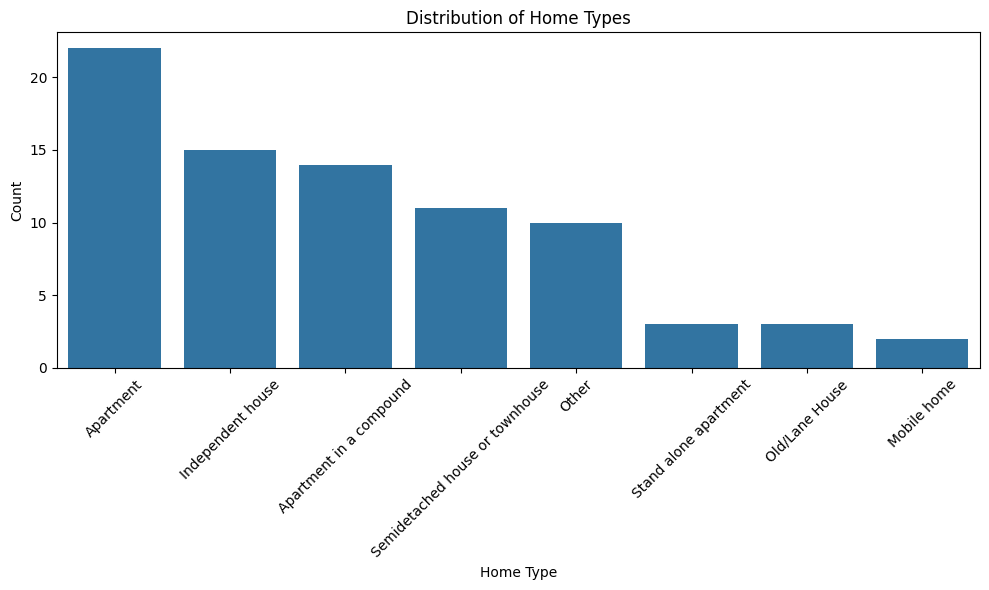

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mapping numerical values to home types
home_type_mapping_ID_NL_US = {
    1.: 'Apartment',
    2.: 'Semidetached house or townhouse',
    3.: 'Independent house',
    4.: 'Mobile home',
    97.: 'Other'
}
home_type_mapping_CN = {
    1.: 'Old/Lane House',
    2.: 'Stand alone apartment',
    3.: 'Apartment in a compound',
    4.: 'Villa',
    5.:	"Serviced Apartment",
    97.:	"Other",
    98.:	"Don't know"
}

# Before applying the mapping for 'Q1_home_CN', ensure it's in the correct numeric format and handle NaN as necessary
AllWave1['Q1_home_ID_NL_US'] = AllWave1['Q1_home_ID_NL_US'].apply(pd.to_numeric, errors='coerce')

# Apply mapping for 'Q1_home_ID_NL_US' with the provided mapping
AllWave1['Q1_home_ID_NL_US'] = AllWave1['Q1_home_ID_NL_US'].map(home_type_mapping_ID_NL_US)

# Before applying the mapping for 'Q1_home_CN', ensure it's in the correct numeric format and handle NaN as necessary
AllWave1['Q1_home_CN'] = AllWave1['Q1_home_CN'].apply(pd.to_numeric, errors='coerce')

# Apply mapping for 'Q1_home_CN' with the provided mapping
AllWave1['Q1_home_CN'] = AllWave1['Q1_home_CN'].map(home_type_mapping_CN)

# Fill NaN values in 'Q1_home_ID_NL_US' with the values from 'Q1_home_CN_mapped'
AllWave1['Q1_home_ID_NL_US'] = AllWave1['Q1_home_ID_NL_US'].fillna(AllWave1['Q1_home_CN'])


# Visualise the distribution of home types
plt.figure(figsize=(10, 6))
sns.countplot(data=AllWave1, x='Q1_home_ID_NL_US', order=AllWave1['Q1_home_ID_NL_US'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribution of Home Types')
plt.xlabel('Home Type')
plt.ylabel('Count')
plt.tight_layout()

plt.show()

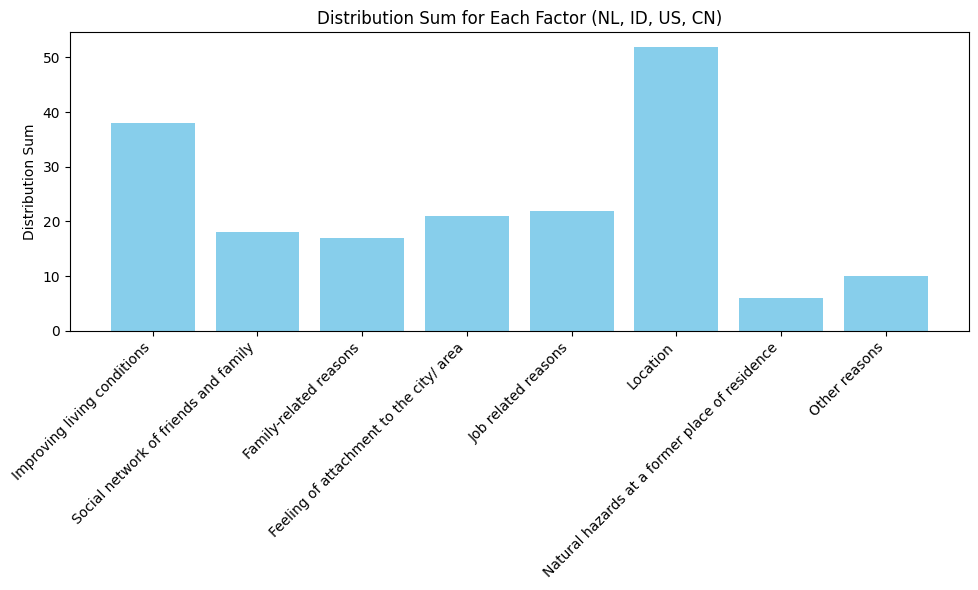

In [ ]:
# Calculate distribution sum for each factor
distribution_sums = []
factors = []

# Define mapping of response options to factors
factor_mapping = {
    'Improving living conditions': 'Q11_search_improve',
    'Social network of friends and family': 'Q11_search_social',
    'Family-related reasons': 'Q11_search_family',
    'Feeling of attachment to the city/ area': 'Q11_search_area',
    'Job related reasons': 'Q11_search_job',
    'Location': 'Q11_search_location',
    'Natural hazards at a former place of residence': 'Q11_search_hazard',
    'Other reasons': 'Q11_search_other',
}

for factor, column in factor_mapping.items():
    distribution_sum = AllWave1[column].sum()
    factors.append(factor)
    distribution_sums.append(distribution_sum)

# Create distribution plot
plt.figure(figsize=(10, 6))
plt.bar(factors, distribution_sums, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Distribution Sum')
plt.title('Distribution Sum for Each Factor (NL, ID, US, CN)')
plt.tight_layout()
plt.show()

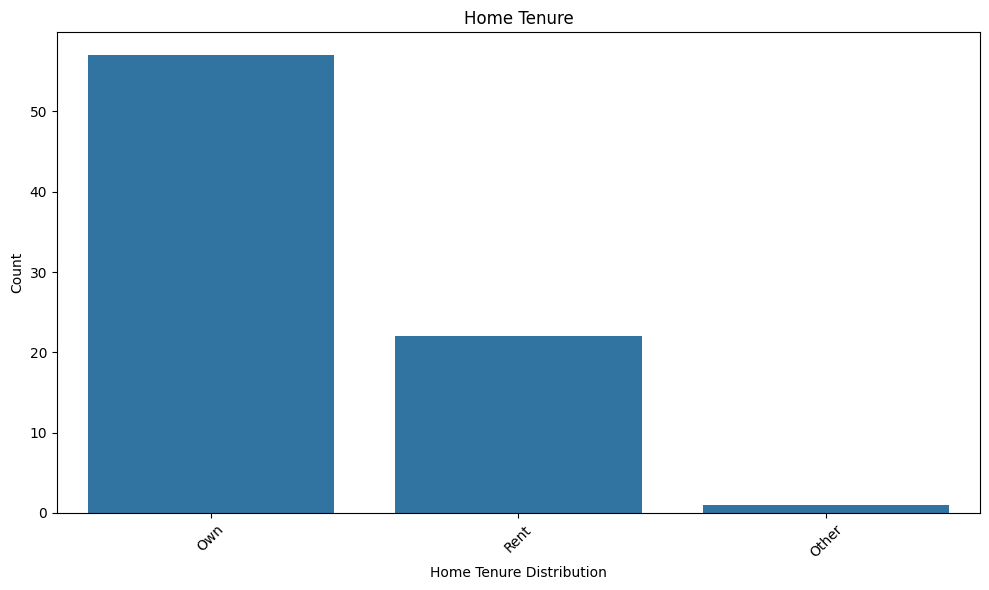

In [ ]:
# Mapping for home tenure
rent_own_mapping = {
    1: 'Rent',
    2: "Own",
    97: 'Other',
}

# Apply mapping
AllWave1['rent_own_mapping'] = AllWave1['Q5_home_tenure'].map(rent_own_mapping)

# Visualize the distribution of home tenure
plt.figure(figsize=(10, 6))
sns.countplot(data=AllWave1, x='rent_own_mapping', order=AllWave1['rent_own_mapping'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Home Tenure')
plt.xlabel('Home Tenure Distribution')
plt.ylabel('Count')
plt.tight_layout()

plt.show()

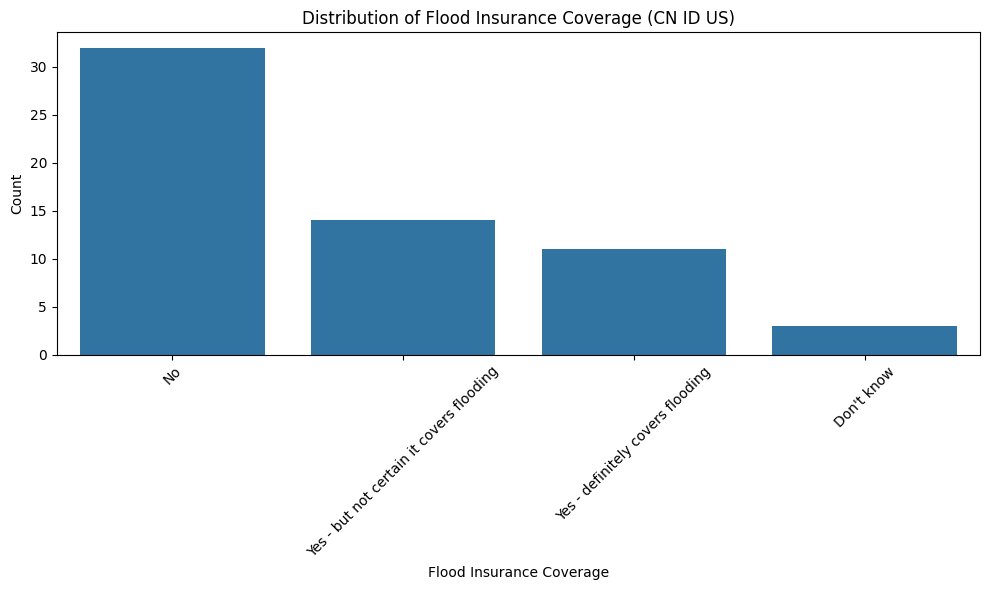

In [ ]:
# Mapping for flood insurance coverage
insurance_coverage_mapping = {
    1: 'Yes - definitely covers flooding',
    2: "Yes - but not certain it covers flooding",
    3: 'No',
    98: "Don't know"
}

# Apply mapping
AllWave1['insurance_coverage_mapped'] = AllWave1['Q41_ins_CN_ID_US'].map(insurance_coverage_mapping)

# Visualize the distribution of insurance coverage
plt.figure(figsize=(10, 6))
sns.countplot(data=AllWave1, x='insurance_coverage_mapped', order=AllWave1['insurance_coverage_mapped'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribution of Flood Insurance Coverage (CN ID US)')
plt.xlabel('Flood Insurance Coverage')
plt.ylabel('Count')
plt.tight_layout()

plt.show()

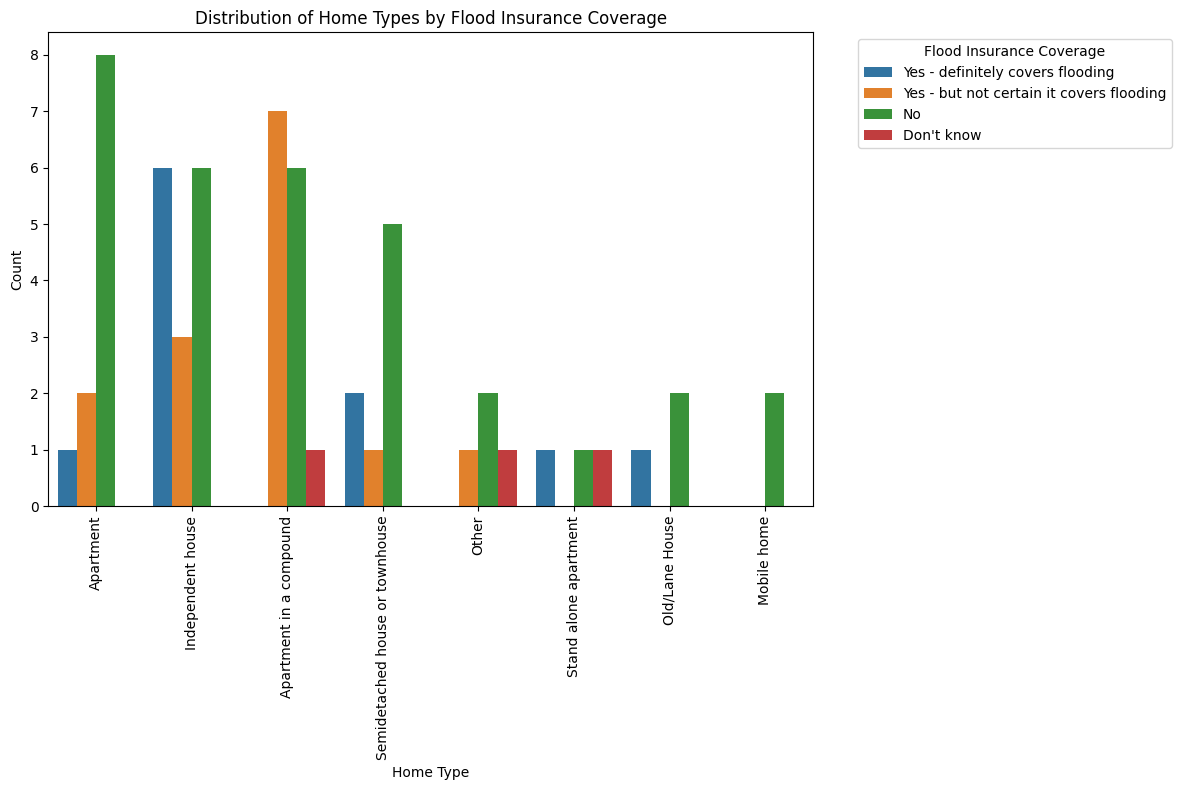

In [ ]:
# Assuming 'AllWave1' DataFrame already has the 'Q1_home_ID_NL_US' and 'Q41_ins_CN_ID_US' columns mapped to their textual descriptions

# Ensure the 'Q1_home_ID_NL_US' column is filled with 'Q1_home_CN' values for NaNs as you've done before
# Note: This step should already be done as per your previous message

# Visualize the distribution of home types with insurance coverage segmentation
plt.figure(figsize=(12, 8))
sns.countplot(data=AllWave1, x='Q1_home_ID_NL_US', hue='insurance_coverage_mapped', 
              order=AllWave1['Q1_home_ID_NL_US'].value_counts().index,
              hue_order=['Yes - definitely covers flooding', 'Yes - but not certain it covers flooding', 'No', "Don't know"])
plt.xticks(rotation=90)
plt.title('Distribution of Home Types by Flood Insurance Coverage')
plt.xlabel('Home Type')
plt.ylabel('Count')
plt.legend(title='Flood Insurance Coverage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()


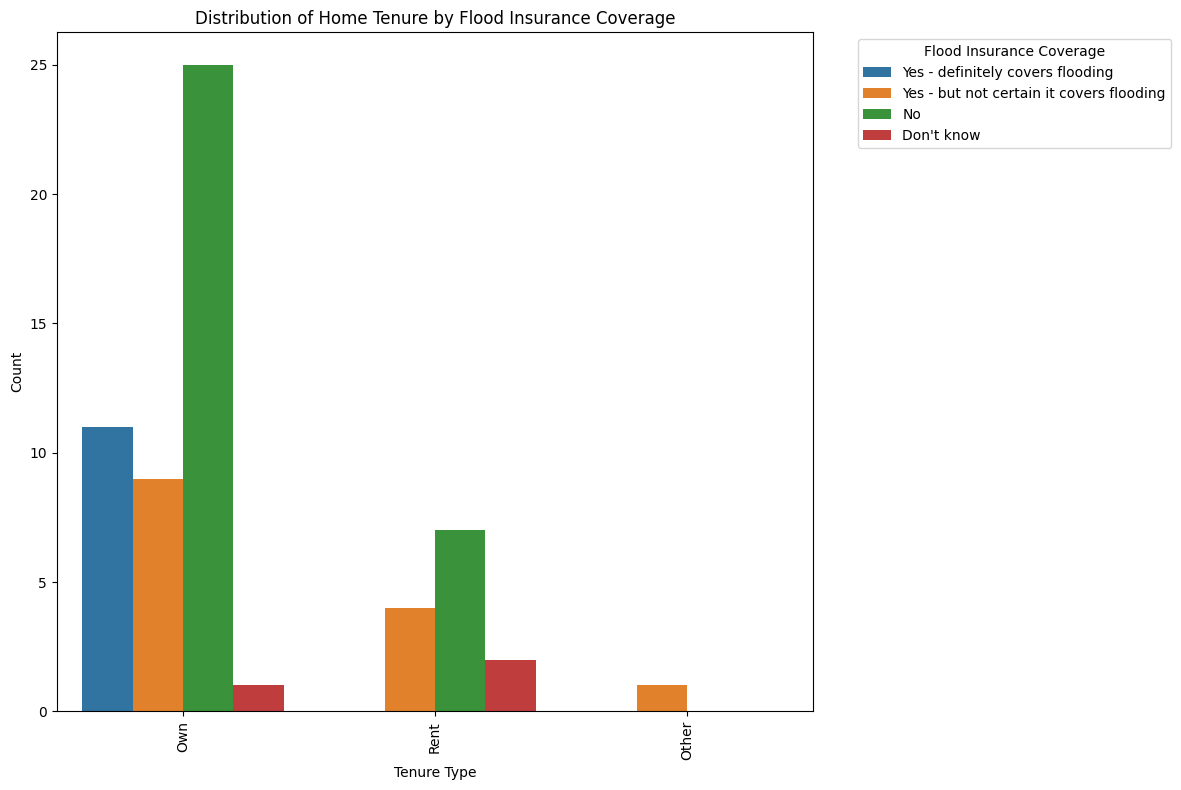

In [ ]:
# Assuming 'AllWave1' DataFrame already has the 'Q1_home_ID_NL_US' and 'Q41_ins_CN_ID_US' columns mapped to their textual descriptions

# Ensure the 'Q1_home_ID_NL_US' column is filled with 'Q1_home_CN' values for NaNs as you've done before
# Note: This step should already be done as per your previous message

# Visualize the distribution of home types with insurance coverage segmentation
plt.figure(figsize=(12, 8))
sns.countplot(data=AllWave1, x='rent_own_mapping', hue='insurance_coverage_mapped', order=AllWave1['rent_own_mapping'].value_counts().index,
              hue_order=['Yes - definitely covers flooding', 'Yes - but not certain it covers flooding', 'No', "Don't know"])
plt.xticks(rotation=90)
plt.title('Distribution of Home Tenure by Flood Insurance Coverage')
plt.xlabel('Tenure Type')
plt.ylabel('Count')
plt.legend(title='Flood Insurance Coverage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

In [ ]:
correlation_data = AllWave1[["Q18_flood_exp", "R05_worry", "R2_implementation_NM4"]].copy()
# Calculate Spearman correlation
correlation_matrix = correlation_data.corr(method='spearman')

correlation_matrix

,Q18_flood_exp,R05_worry,R2_implementation_NM4
Q18_flood_exp,1.000000,0.261944,-0.129233
R05_worry,0.261944,1.000000,-0.282069
R2_implementation_NM4,-0.129233,-0.282069,1.000000


In [ ]:
correlation_data = pd.DataFrame()
correlation_data['Q44_social_expectation'] = AllWave1['Q44_social_expectation'].copy()

# Create a new column that counts the occurrences of value == 1 in the specified columns
correlation_data['sum of household infrastructure change'] = AllWave1[['R2_implementation_SM1',
                                          'R2_implementation_SM2',
                                          'R2_implementation_SM3',
                                          'R2_implementation_SM4',
                                          'R2_implementation_SM5',
                                          'R2_implementation_SM6',
                                          'R2_implementation_SM7']].apply(lambda x: x.sum(), axis=1)

# Adjust 'Q41_ins_CN_ID_US' column based on the given condition
correlation_data['Intentional Flood insurance'] = AllWave1['Q41_ins_CN_ID_US'].apply(lambda x: 0 if x != 1 else x)

# Calculate Spearman correlation
correlation_matrix = correlation_data.corr(method='spearman')

correlation_matrix


,Q44_social_expectation,sum of household infrastructure change,Intentional Flood insurance
Q44_social_expectation,1.000000,-0.397670,0.338019
sum of household infrastructure change,-0.397670,1.000000,-0.263891
Intentional Flood insurance,0.338019,-0.263891,1.000000
